## Cargando Librerias

In [324]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import warnings 
import seaborn as sns
warnings.filterwarnings("ignore")

In [325]:
# Conexion a Google Colaborative
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [326]:
#-------------------------------------#
# Generamos una copia de nuestro data #
#-------------------------------------#

In [327]:
train_original=pd.read_csv("/content/drive/MyDrive/13 PROYECTOS/6 proyecto-Prestamo bancario/train_ctrUa4K.csv")
test_original=pd.read_csv("/content/drive/MyDrive/13 PROYECTOS/6 proyecto-Prestamo bancario/test_lAUu6dG.csv")

In [328]:
train=train_original.copy()
test=test_original.copy()

In [329]:
#################
# entrenamiento #
#################
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [330]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [331]:
train.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [332]:
##########
# testeo #
##########
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [333]:
##############
# comentario #
##############
# Hay datos perdidos en train y tambien en test.
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [334]:
print('entrenamiento',train.shape)
print('testeo',test.shape)

entrenamiento (614, 13)
testeo (367, 12)


In [335]:
#~~~~~~~~~#
# indices #
#~~~~~~~~~#
indices_train=train.Loan_ID
indices_test=test.Loan_ID
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# eliminamos los indices del train y test  #
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
train.drop(columns=['Loan_ID'],axis=1,inplace=True)
test.drop(columns=['Loan_ID'],axis=1,inplace=True)
print('entrenamiento',train.shape)
print('testeo',test.shape)

entrenamiento (614, 12)
testeo (367, 11)


In [336]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~#
# niveles de cada variable #
#~~~~~~~~~~~~~~~~~~~~~~~~~~#
#################
# entrenamiento #
#################
print("------------------------------")
print("--------entrenamiento---------")
print(train.nunique())
 
##########
# testeo #
##########
 
print("--------testeo---------")
print("-----------------------")
print(test.nunique())


------------------------------
--------entrenamiento---------
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64
--------testeo---------
-----------------------
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64


In [337]:
train.shape,test.shape

((614, 12), (367, 11))

* **Conclusiones**:
  - **Tenemos variables ordinales,nominales y numericas:**
  - ordinales:Education,Dependents
  - nominales:Gender,Married,Self_Employed,Credit_History,Property_Area,Loan_Status
  - numericas:ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
  -**Grafica ordinales y nominales:**   
  - barras y barras apiladas
  -**Grafica numericas:**
  -histograma y cajas(violin)   

  **NOTA: La variable target "Loan_Status" no se encuentra en la data de testeo**

In [338]:
train.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

## Analisis Exploratorio
- Primero : Se trabaja con la dta de entrenamiento, es decir "train"
- Segundo : Hacer un Analisis Exploratorio en su formato inicial de la variables

### Analisis Univariado  

#### Variable Independientes CATEGORICAS

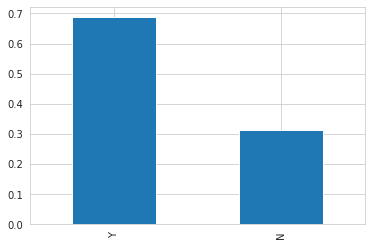

In [339]:
train.Loan_Status.value_counts(normalize=True).plot.bar()

In [340]:
train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

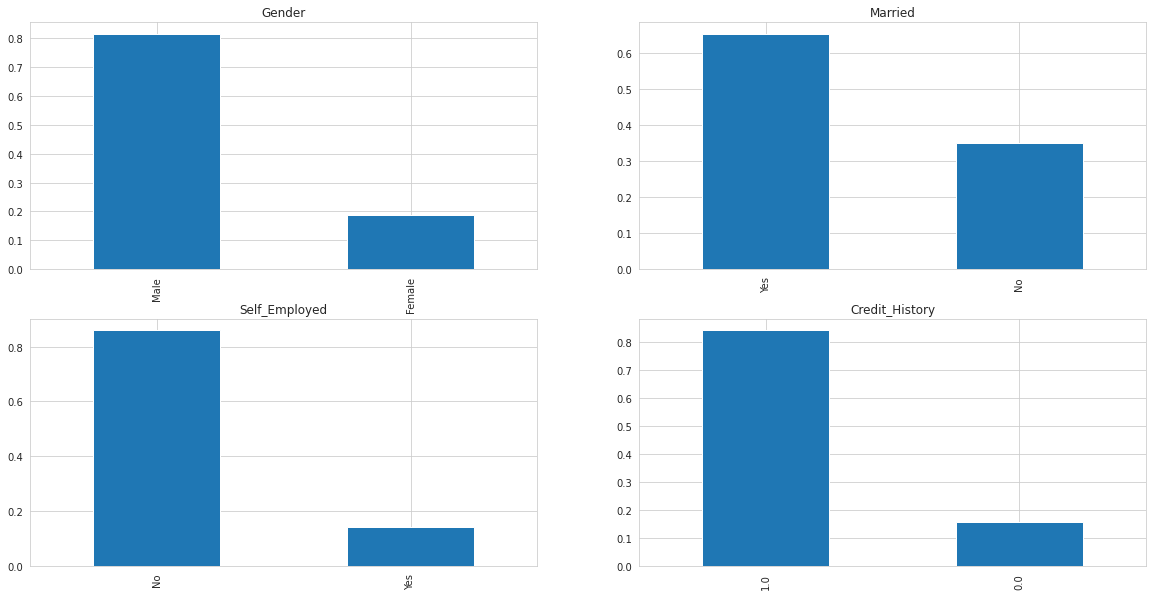

In [341]:
from matplotlib.colors import Normalize
#---------------------#
# Analisis Univariado #
#---------------------#

#El objetivo de normalizar es que la variable estara en un intervalo de [0:1]
#asi se podra visualizar mejor todas las variables en una misma escala.

plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Married")
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Self_Employed")
plt.subplot(224)
train["Credit_History"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Credit_History")

In [342]:
#-------------#
# Comentarios #
#-------------#
# El 80 % de los solicitantes son hombres.
# Alrededor 65% de los solicitantes son casados.
# Alrededor 15% de los solicitantes son trabajadores por su propia cuenta.
# Alrededor 85%  de los solicitantes tienen un historial crediticio.

### Variable Independientes ORDINAL

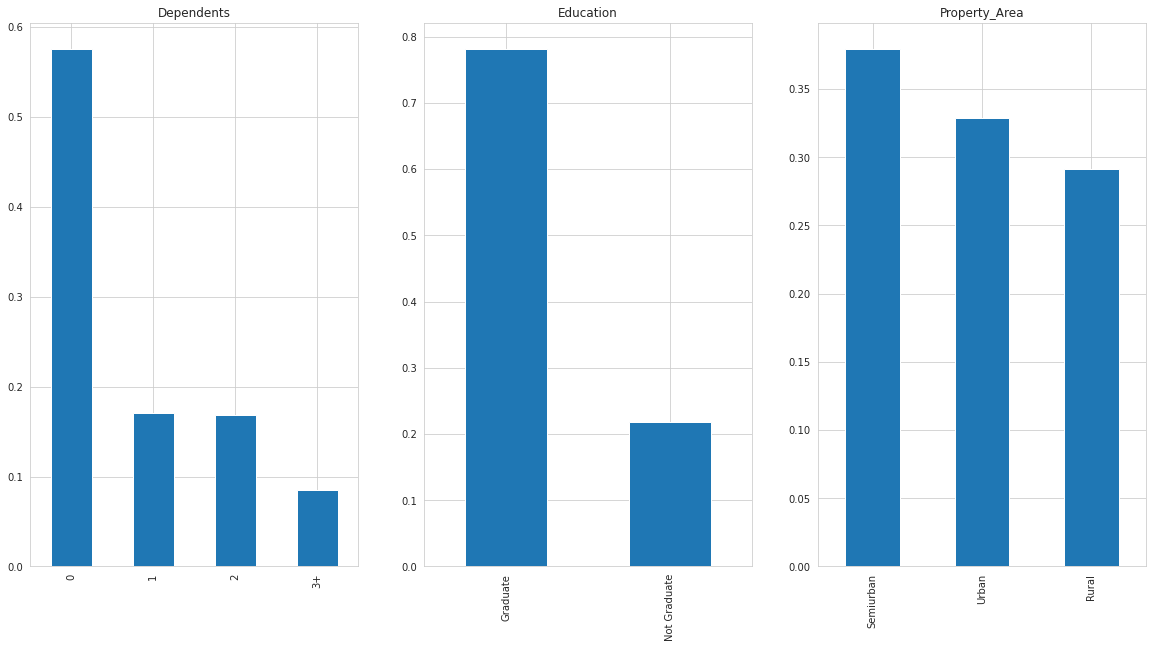

In [343]:
plt.figure(1)
plt.subplot(131)
train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Dependents")
plt.subplot(132)
train["Education"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Education")
plt.subplot(133)
train["Property_Area"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Property_Area")

In [344]:
#-------------#
# Comentarios #
#-------------#
#1. La mayoría de los solicitantes no tienen dependientes
#2. Alrededor de 80% de los solicitantes son graduados
#3. La mayoría de los solicitantes son del área semiurbana

### Variable Independientes NUMERICAL

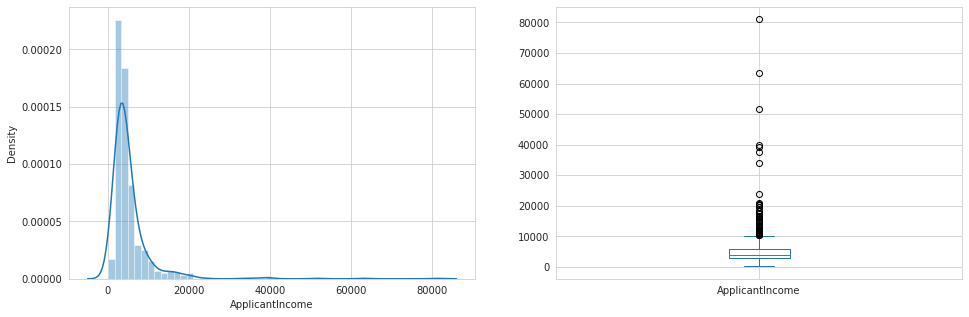

In [345]:
from traitlets.config.application import Application
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"]) #ingreso del solicitante !! 
plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

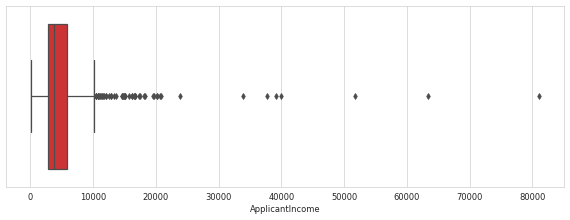

In [346]:
# Grouped boxplot
plt.figure(figsize=(12,4), dpi=60)
sns.boxplot(x="ApplicantIncome", data=train, palette="Set1")
            #univariado#
            #     bivariado        #
            #     incluyendo la target           #                    
plt.show()

In [347]:
train.ApplicantIncome.mean()

5403.459283387622

In [348]:
#-------------#
# Comentarios #
#-------------#
#1. El ingreso promedio esta alrededor de 5403.459
 

Text(0.5, 0.98, '')

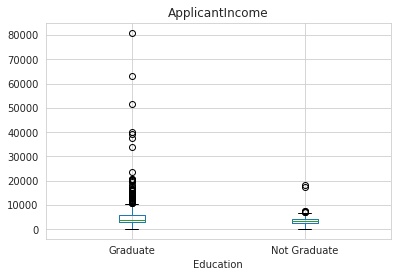

In [349]:
train.boxplot(column="ApplicantIncome",by="Education")
plt.suptitle("")

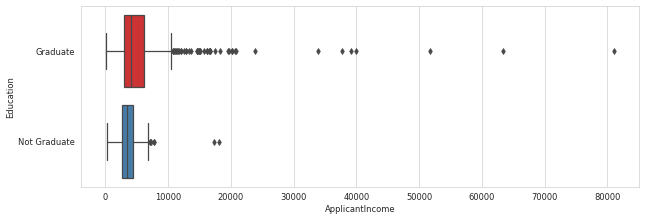

In [350]:
# Grouped boxplot
plt.figure(figsize=(12,4), dpi=60)
sns.boxplot(x="ApplicantIncome", y="Education", data=train, palette="Set1")
            #univariado#
            #     bivariado        #
            #     incluyendo la target         #                    
plt.show()

In [351]:
(train[(train['Education']=='Graduate')]).ApplicantIncome.describe()

count      480.000000
mean      5857.433333
std       6739.797954
min        150.000000
25%       2998.750000
50%       4000.000000
75%       6068.750000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [352]:
(train[(train['Education']=='Not Graduate')]).ApplicantIncome.describe()

count      134.000000
mean      3777.283582
std       2237.081586
min        210.000000
25%       2583.000000
50%       3357.500000
75%       4333.000000
max      18165.000000
Name: ApplicantIncome, dtype: float64

In [353]:
#-------------#
# Comentarios #
#-------------#
#1. El ingreso promedio para los graduados es 5857.433333
#2. El ingreso promedio para los no graduados es 3777.283582

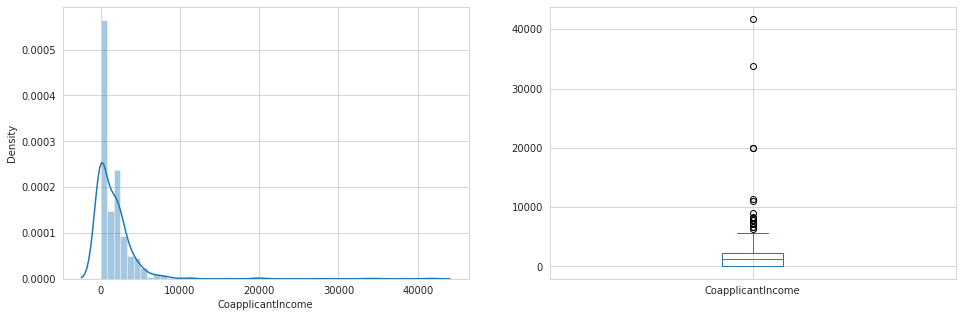

In [354]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"])  #Ingresos del cosolicitante
plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

In [355]:
train.CoapplicantIncome.mean()

1621.2457980271008

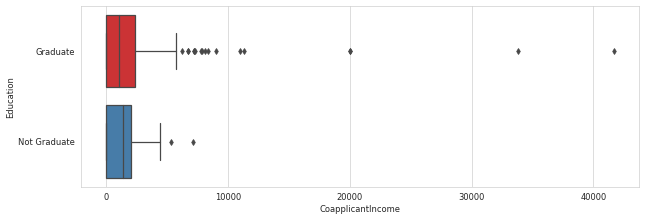

In [356]:
# Grouped boxplot
plt.figure(figsize=(12,4), dpi=60)
sns.boxplot(x="CoapplicantIncome", y="Education", data=train, palette="Set1")
            #univariado#
            #     bivariado       #
            #     incluyendo la target          #                    
plt.show()

In [357]:
train[(train["Education"]=="Not Graduate")].CoapplicantIncome.describe()

count     134.000000
mean     1276.544776
std      1310.343602
min         0.000000
25%         0.000000
50%      1356.500000
75%      2028.250000
max      7101.000000
Name: CoapplicantIncome, dtype: float64

In [358]:
(train[(train['Education']=='Graduate')] ).CoapplicantIncome.describe()

count      480.000000
mean      1717.474833
std       3230.965850
min          0.000000
25%          0.000000
50%       1059.000000
75%       2337.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [359]:
#-------------#
# Comentarios #
#-------------#
#1. Ingresos del cosolicitante promedio para los graduados es  1717.474833
#2. Ingresos del cosolicitante promedio para los no graduados es 1276.544776	

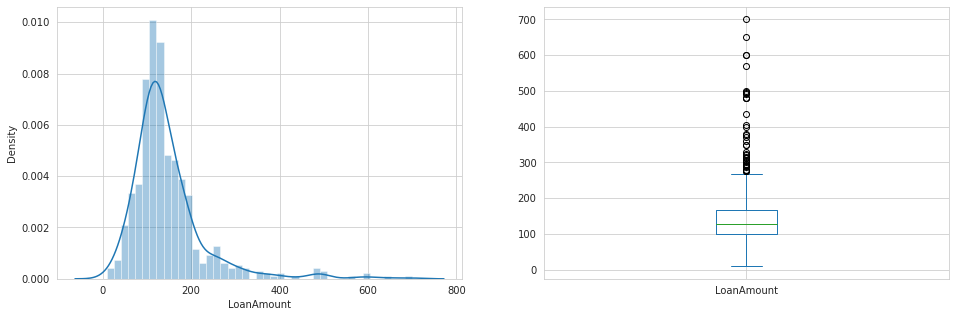

In [360]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["LoanAmount"])  # Monto del préstamo
plt.subplot(122)
train["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

In [361]:
train.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

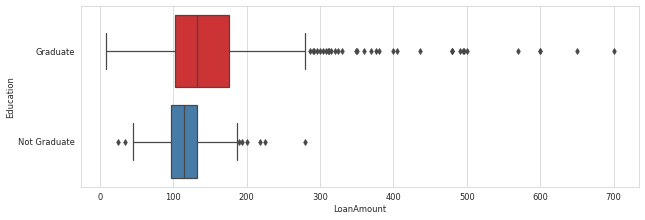

In [362]:
# Grouped boxplot
plt.figure(figsize=(12,4), dpi=60)
sns.boxplot(x="LoanAmount", y="Education", data=train, palette="Set1")
            #univariado#
            #     bivariado        #
            #     incluyendo la target           # 

In [363]:
(train[(train['Education']=='Graduate')]).LoanAmount.describe()

count    465.000000
mean     154.060215
std       92.883366
min        9.000000
25%      103.000000
50%      132.000000
75%      176.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [364]:
train[train['Education']=="Not Graduate" ].LoanAmount.describe()

count    127.000000
mean     118.409449
std       39.773636
min       25.000000
25%       96.500000
50%      115.000000
75%      133.000000
max      279.000000
Name: LoanAmount, dtype: float64

In [365]:
#-------------#
# Comentarios #
#-------------#
#1. El monto de prestamo promedio graduados es 154.060215
#2. El monto de prestamo promedio no graduados es 118.409449

## Analisis Bivariado 

### Variable Categorica Independiente VS Target Variable

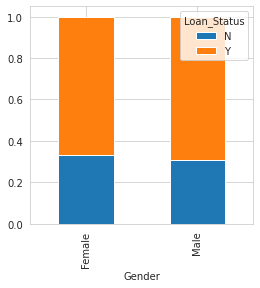

In [366]:
Gender=pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

In [367]:
Gender.div(Gender.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


VARIABLE Married VS Loan_Status
*************
tablita
*************
Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.283920  0.716080
------------------------------------------------------------------------------
VARIABLE Dependents VS Loan_Status
*************
tablita
*************
Loan_Status         N         Y
Dependents                     
0            0.310145  0.689855
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059
------------------------------------------------------------------------------
VARIABLE Education VS Loan_Status
*************
tablita
*************
Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940
------------------------------------------------------------------------------
VARIABLE Self_Employed VS Loan_Status
*************
tablita
*************
Loan_Status           N     

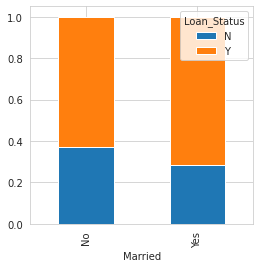

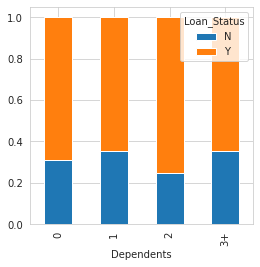

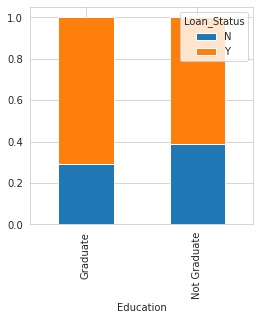

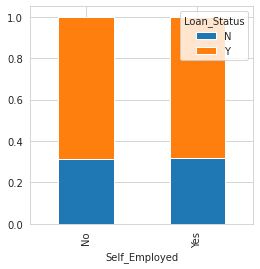

In [368]:
print("VARIABLE Married VS Loan_Status")
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
print('*************')
print("tablita")
print("*************")
print(Married.div(Married.sum(1).astype(float),axis=0))
print("------------------------------------------------------------------------------")

print("VARIABLE Dependents VS Loan_Status")
Dependents=pd.crosstab(train["Dependents"],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
print('*************')
print("tablita")
print("*************")
print(Dependents.div(Dependents.sum(1).astype(float),axis=0))
print("------------------------------------------------------------------------------")

print("VARIABLE Education VS Loan_Status")
Education=pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
print('*************')
print("tablita")
print("*************")
print(Education.div(Education.sum(1).astype(float),axis=0))
print("------------------------------------------------------------------------------")

print("VARIABLE Self_Employed VS Loan_Status")
Self_Employed=pd.crosstab(train["Self_Employed"],train["Loan_Status"])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
print('*************')
print("tablita")
print("*************")
print(Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0))

In [369]:
# comentario:
#-----------
#1.la proporción de solicitantes casados es mayor para los préstamos aprobados
#2.la distribución de solicitantes con 1 o 3+ dependientes es similar en ambas categorías de estado_de_préstamo
#3.no hay nada significativo que podamos inferir de la gráfica self_employed vs Loan_Status
#4.la proporcion de graduados es mayor para los prestamos aprobados

VARIABLE Credit_History VS Loan_Status
*************
tablita
*************
Loan_Status            N         Y
Credit_History                    
0.0             0.921348  0.078652
1.0             0.204211  0.795789


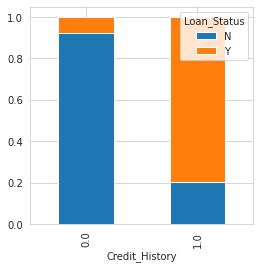

In [370]:
print("VARIABLE Credit_History VS Loan_Status")
Credit_History=pd.crosstab(train["Credit_History"],train["Loan_Status"])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
print('*************')
print("tablita")
print("*************")
print(Credit_History.div(Credit_History.sum(1).astype(float),axis=0))

VARIABLE Property_Area VS Loan_Status
*************
tablita
*************
Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  0.658416


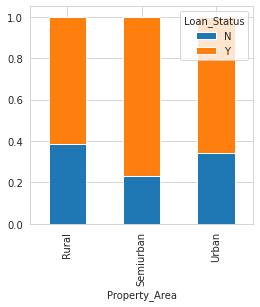

In [371]:
print("VARIABLE Property_Area VS Loan_Status")
Property_Area=pd.crosstab(train["Property_Area"],train["Loan_Status"])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
print('*************')
print("tablita")
print("*************")
print(Property_Area.div(Property_Area.sum(1).astype(float),axis=0))

In [372]:
#-----------#
# comentario #
#-----------#
#1.parece que las personas con historial crediticio
# como 1 tienen más probabilidades de obtener la aprobación de sus préstamos

#2.la proporción de préstamos que se aprueban en el área semiurbana
#  es mayor en comparación con la de las áreas rurales o urbanas

### Variables  Numerical Independientes vs Target 

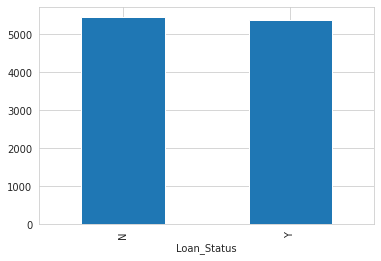

In [373]:
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()

In [374]:
train.groupby("Loan_Status")["ApplicantIncome"].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [375]:
#--------------#
# comentario
#--------------#
#Aquí el eje y representa el ingreso medio del solicitante. 
#No vemos ningún cambio en el ingreso medio. Por lo tanto, 
#clasifiquemos la variable de ingresos del solicitante según los valores que contiene 
#y analicemos el estado del préstamo correspondiente para cada intervalo.

In [376]:
print(len(train.columns))
print(len(test.columns))

12
11


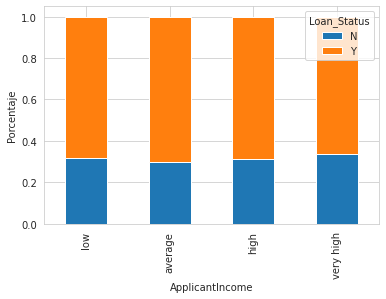

In [377]:
bins=[0,2500,4000,6000,81000]
group=["low","average","high","very high"]
train["income_bin"]=pd.cut(train["ApplicantIncome"],bins,labels=group)

income_bin=pd.crosstab(train["income_bin"],train["Loan_Status"])
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("ApplicantIncome")
P=plt.ylabel("Porcentaje")

In [378]:
income_bin.div(income_bin.sum(1).astype(float),axis=0)

Loan_Status,N,Y
income_bin,,
low,0.314815,0.685185
average,0.296460,0.703540
high,0.314685,0.685315
very high,0.335766,0.664234


In [379]:
# testeo
bins=[0,2500,4000,6000,81000]
group=["low","average","high","very high"]
test["income_bin"]=pd.cut(test["ApplicantIncome"],bins,labels=group)

In [380]:
#--------------#
# comentario
#--------------#
#muestra que si los ingresos del cosolicitante son menores, 
#las posibilidades de aprobación del préstamo son altas. 
#la aprobación no depende de ella. Por lo tanto, 
#podemos crear una nueva variable en la que combinaremos los ingresos del solicitante 
#y del cosolicitante para visualizar el efecto combinado de los ingresos en la aprobación del préstamo.
#combinemos el ingreso del solicitante y el ingreso del solicitante y 
#veamos el efecto combinado del ingreso total en el estado del préstamo

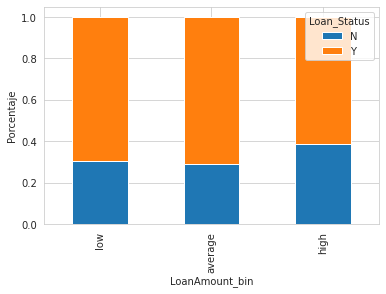

In [381]:
#~~~~~~~~~~~~~~~#
# entrenamiento #
#~~~~~~~~~~~~~~~#
bins=[0,100,200,700]
group=["low","average","high"]
train["LoanAmount_bin"]=pd.cut(train["LoanAmount"],bins,labels=group)
LoanAmount_bin=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("LoanAmount_bin")
P=plt.ylabel("Porcentaje")

In [382]:
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0)

Loan_Status,N,Y
LoanAmount_bin,,
low,0.305195,0.694805
average,0.287709,0.712291
high,0.387500,0.612500


In [383]:
#~~~~~~~~#
# testeo #
#~~~~~~~~#
bins=[0,100,200,700]
group=["low","average","high"]
test["LoanAmount_bin"]=pd.cut(test["LoanAmount"],bins,labels=group)


In [384]:
print(len(train.columns))
print(len(test.columns))

14
13


In [385]:
#--------------------#
# comentario 
#--------------------#

# 1)
#se puede ver que la proporción de préstamos aprobados 
#es mayor para el monto promedio de préstamo bajo en comparación 
#con el monto de préstamo alto, lo que respalda nuestra hipótesis 
#en la que consideramos que las posibilidades de aprobación del préstamo 
#serán altas cuando el monto del préstamo sea menor.

# 2)
#Suelte los contenedores que creamos para la parte de exploración. 
#Cambiaremos la variable 3+ en dependientes a 3 para convertirla 
#en una variable numérica. 
#También convertiremos las categorías de la variable objetivo en 0 y 1 
#para que podamos encontrar su correlación con variables numéricas. 
#Una razón más para hacerlo es que pocos modelos como la regresión logística 
#solo toman valores numéricos como entrada. reemplazaremos N con 0 e Y con 1.

## Analisis Multivariado _ variables Numericas

In [386]:
#Ahora veamos la correlación entre todas las variables numéricas. 
#Usaremos el mapa de calor para visualizar datos a través de variaciones en el color.
#Las variables con color más oscuro significa que su correlación es mayor.

In [387]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [388]:
train['Loan_Status']=train['Loan_Status'].map({"Y":1,
                                               "N":0})

In [389]:
train['Loan_Status']=train['Loan_Status'].astype("int")

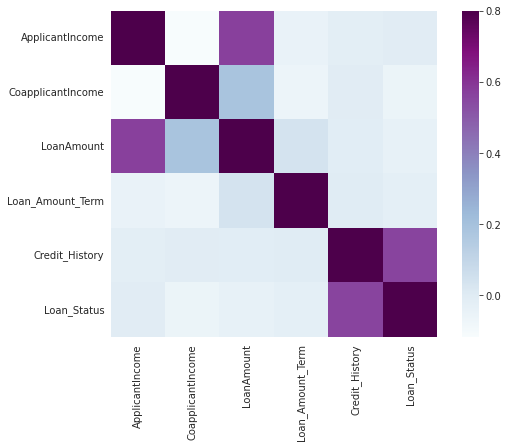

In [390]:
matrix= train.corr() 
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")

In [391]:
#-------------#
# Comentario  #
#-------------#

# Entre variables independientes:
#--------------------------------
#Vemos que las variables mas relacionadas son (ingres del solicitante-monto del prestamo)
#y (historial_credito-estado de prestamo).Monto del prestamo tambien esta relacionado con el ingreso de
#de los coaplicantes.

## Limpieza de datos Perdidos

In [392]:
print(len(train.columns))
print(len(test.columns))

14
13


In [393]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
income_bin            0
LoanAmount_bin       22
dtype: int64

**Conclusiones:**

Tenemos variables ordinales,nominales y numericas:

**ordinales**:Education,Dependents

**nominales**:Gender,Married,Self_Employed,Credit_History,Property_Area,Loan_Status

**numericas**:ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term

**Grafica ordinales y nominales**:
barras y barras apiladas

**Grafica numericas**:
histograma y cajas(violin)

**NOTA: La variable target "Loan_Status" no se encuentra en la data de testeo**

#### entrenamiento

In [394]:
lista_moda=['Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term','LoanAmount_bin','income_bin']
lista_mediana=["LoanAmount"]

In [395]:
train[lista_moda].nunique()

Gender               2
Married              2
Dependents           4
Self_Employed        2
Credit_History       2
Loan_Amount_Term    10
LoanAmount_bin       3
income_bin           4
dtype: int64

In [396]:
test[lista_moda].nunique()

Gender               2
Married              2
Dependents           4
Self_Employed        2
Credit_History       2
Loan_Amount_Term    12
LoanAmount_bin       3
income_bin           4
dtype: int64

In [397]:
train[lista_moda].isnull().sum()

Gender              13
Married              3
Dependents          15
Self_Employed       32
Credit_History      50
Loan_Amount_Term    14
LoanAmount_bin      22
income_bin           0
dtype: int64

In [398]:
train[lista_moda].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Gender            601 non-null    object  
 1   Married           611 non-null    object  
 2   Dependents        599 non-null    object  
 3   Self_Employed     582 non-null    object  
 4   Credit_History    564 non-null    float64 
 5   Loan_Amount_Term  600 non-null    float64 
 6   LoanAmount_bin    592 non-null    category
 7   income_bin        614 non-null    category
dtypes: category(2), float64(2), object(4)
memory usage: 30.4+ KB


In [399]:
#------#
# moda #
#------#
for i in train[lista_moda].columns:
  train[i]=train[i].fillna(train[i].mode()[0])

In [400]:
#---------#
# mediana #
#---------#
for i in train[lista_mediana].columns:
  train[i]=train[i].fillna(train[i].median())

In [401]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
income_bin           0
LoanAmount_bin       0
dtype: int64

#### testeo

In [402]:
for i in test[lista_moda].columns:
  test[i]=test[i].fillna(test[i].mode()[0])

In [403]:
for i in test[lista_mediana].columns:
  test[i]=test[i].fillna(test[i].median())

In [404]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
income_bin           0
LoanAmount_bin       0
dtype: int64

In [405]:
train.Dependents.value_counts() 

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [406]:
test.Dependents=test.Dependents.astype("object")
train.Dependents=train.Dependents.astype("object")

In [407]:
test.Dependents=test.Dependents.map({
    '0':0,
    '1':1,
    '2':2,
    '3+':3})
train.Dependents=train.Dependents.map({
    '0':0,
    '1':1,
    '2':2,
    '3+':3})

In [408]:
#-------------#
# Data limpia #testeo
#-------------#
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
income_bin           0
LoanAmount_bin       0
dtype: int64

In [409]:
#-------------#
# Data limpia #entrenamiento
#-------------#
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
income_bin           0
LoanAmount_bin       0
dtype: int64

In [410]:
#------------#
# cometario: #
#------------#

#Ahora busquemos una forma de completar los valores que faltan en préstamo_cantidad_término. 
#Veremos el recuento de valores de la variable del término del monto del préstamo.

#se puede ver que en la variable del plazo del monto del préstamo, el valor de 360 es el que más se repite. 
#Por lo tanto, reemplazaremos los valores que faltan en esta variable usando la moda de esta variable.

#Ahora veremos la variable del monto del préstamo. Como es una variable numérica, 
#podemos usar la media o la mediana para imputar los valores que faltan. Usaremos la mediana para completar los valores nulos, 
#ya que vimos anteriormente que el monto del préstamo tiene valores atípicos, por lo que la media no es el enfoque adecuado, 
#ya que se ve muy afectado por la presencia de valores atípicos.

#Ahora vamos a comprobar si todos los valores que faltan se completan en el conjunto de datos

--------------antes--------------


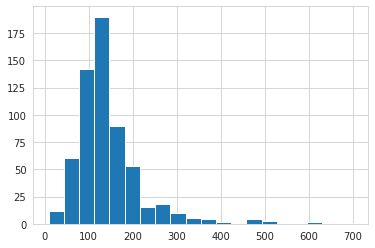

In [411]:

print("--------------antes--------------")
train["LoanAmount"].hist(bins=20)

--------------despues--------------


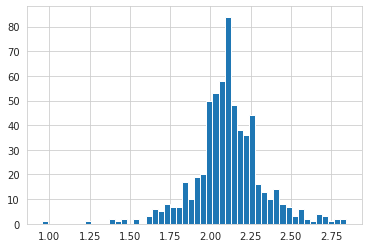

In [412]:
print("--------------despues--------------")
train["LoanAmount_log"]=np.log10(train["LoanAmount"])
train["LoanAmount_log"].hist(bins=50)

In [413]:
print(len(train.columns))
print(len(test.columns))

15
13


--------------despues--------------


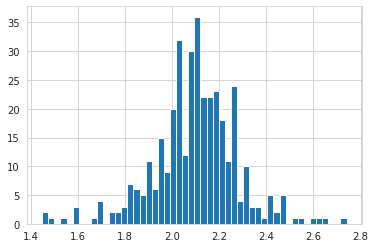

In [414]:
 # testeo
print("--------------despues--------------")
test["LoanAmount_log"]=np.log10(test["LoanAmount"])
test["LoanAmount_log"].hist(bins=50)

## Particion entrenamiento - testeo

In [415]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
income_bin           0
LoanAmount_bin       0
LoanAmount_log       0
dtype: int64

In [416]:
# observacion: la variable Loan_Amount_Term tiene 12 niveles en la data de testeo y 10 niveles en la data en entrenamiento
lista_moda

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'Credit_History',
 'Loan_Amount_Term',
 'LoanAmount_bin',
 'income_bin']

In [417]:
print(train.Loan_Amount_Term.nunique())
print(test.Loan_Amount_Term.nunique())
# por esta razon lo convertimos en numerico !!! 

10
12


In [418]:
# testeo
test.Loan_Amount_Term=test.Loan_Amount_Term.astype("float")
#entrenamiento
train.Loan_Amount_Term=train.Loan_Amount_Term.astype("float")

In [419]:
lista_moda_1=['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'Credit_History',
 'LoanAmount_bin',
 'income_bin']

In [420]:
train[lista_moda_1].dtypes

Gender              object
Married             object
Dependents           int64
Self_Employed       object
Credit_History     float64
LoanAmount_bin    category
income_bin        category
dtype: object

In [421]:
test[lista_moda_1].dtypes

Gender              object
Married             object
Dependents           int64
Self_Employed       object
Credit_History     float64
LoanAmount_bin    category
income_bin        category
dtype: object

In [422]:
# entrenamiento
for i in train[lista_moda_1].columns:
  train[i]=train[i].astype("object")

# testeo
for i in test[lista_moda_1].columns:
  test[i]=test[i].astype("object") 

In [423]:
x_entrenamiento=train.drop('Loan_Status',1)
y_entrenamiento=train.Loan_Status

In [424]:
print(len(train.columns))
print(len(test.columns))

15
14


el proceso de creación de modelos no está completo sin una evaluación del rendimiento del modelo. Supongamos que tenemos el
¿Las predicciones son precisas? Podemos trazar los resultados y compararlos con los valores reales, es decir, Calcular la distancia entre las predicciones y los valores reales.
cuanto menor sea esta distancia, más precisas serán las predicciones. Dado que este es un problema de clasificación, podemos evaluar nuestros modelos utilizando cualquiera de las siguientes métricas de evaluación:

In [425]:
x_entrenamiento=pd.get_dummies(x_entrenamiento)
x_entrenamiento.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,income_bin_average,income_bin_high,income_bin_low,income_bin_very high,LoanAmount_bin_average,LoanAmount_bin_high,LoanAmount_bin_low
0,5849,0.0,128.0,360.0,2.10721,0,1,1,0,1,...,0,0,1,0,1,0,0,1,0,0
1,4583,1508.0,128.0,360.0,2.10721,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0


In [426]:
train=pd.get_dummies(train)
train.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,income_bin_average,income_bin_high,income_bin_low,income_bin_very high,LoanAmount_bin_average,LoanAmount_bin_high,LoanAmount_bin_low
0,5849,0.0,128.0,360.0,1,2.10721,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
1,4583,1508.0,128.0,360.0,0,2.10721,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [427]:
test=pd.get_dummies(test)
test.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,income_bin_average,income_bin_high,income_bin_low,income_bin_very high,LoanAmount_bin_average,LoanAmount_bin_high,LoanAmount_bin_low
0,5720,0,110.0,360.0,2.041393,0,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
1,3076,1500,126.0,360.0,2.100371,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0


##### Regresion logistica

In [428]:
# entrenamiento
x_entrenamiento=pd.get_dummies(x_entrenamiento)# no esta la target 29 var
train=pd.get_dummies(train)# si esta la target 30 var
#testeo
test=pd.get_dummies(test) # no esta la target 29 var

In [429]:
train.shape,test.shape

((614, 30), (367, 29))

In [430]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_entrenamiento,y_entrenamiento,test_size=0.3)

In [431]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
modelito=LogisticRegression()
modelito.fit(x_train,y_train)
# testeo
y_predicho=modelito.predict(x_test)
accuracy_score(y_test,y_predicho)

0.8

In [432]:
print("test falso",len(x_test.columns))
print("test original",len(test.columns))
print("train original",len(train.columns))
#
print("columnas de testeo",test.columns)
print("columnas de entrenamiento",train.columns)
#---------------------------------------------------------------------------------------#
# NOTA: el "test original" y el "test falso" deben tener la misma cantidad de variables #
#---------------------------------------------------------------------------------------#
# rpta: ambos tienen 29 variables. VAMOS BIEN !!!

test falso 29
test original 29
train original 30
columnas de testeo Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Credit_History_0.0', 'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'income_bin_average',
       'income_bin_high', 'income_bin_low', 'income_bin_very high',
       'LoanAmount_bin_average', 'LoanAmount_bin_high', 'LoanAmount_bin_low'],
      dtype='object')
columnas de entrenamiento Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2',

In [433]:
#-----------------#
# testeo original #
#-----------------#
y_predicho_test=modelito.predict(test)


In [434]:
y_predicho_test=pd.DataFrame(y_predicho_test)

### Creando una Submision

In [435]:
submision=pd.DataFrame

In [436]:
submision

pandas.core.frame.DataFrame

In [437]:
indices_test.head()

0    LP001015
1    LP001022
2    LP001031
3    LP001035
4    LP001051
Name: Loan_ID, dtype: object

In [438]:
submision=pd.concat([indices_test,y_predicho_test],axis=1)

In [439]:
submision.columns=['Loan_ID','Loan_Status']

In [440]:
submision

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [441]:
from sklearn.model_selection import StratifiedKFold
i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x_entrenamiento,y_entrenamiento):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl=x_entrenamiento.iloc[train_index],x_entrenamiento.iloc[test_index]
  ytr,yvl=y_entrenamiento.iloc[train_index],y_entrenamiento.iloc[test_index]
  model=LogisticRegression(random_state=1)
  model.fit(xtr,ytr)
  pred_test=model.predict(xvl)
  score=accuracy_score(yvl,pred_test)
  print("accuracy_score",score)
  i+=1 
  pred_test=model.predict(test)
  pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7804878048780488

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8211382113821138

5 of kfold 5
accuracy_score 0.8032786885245902


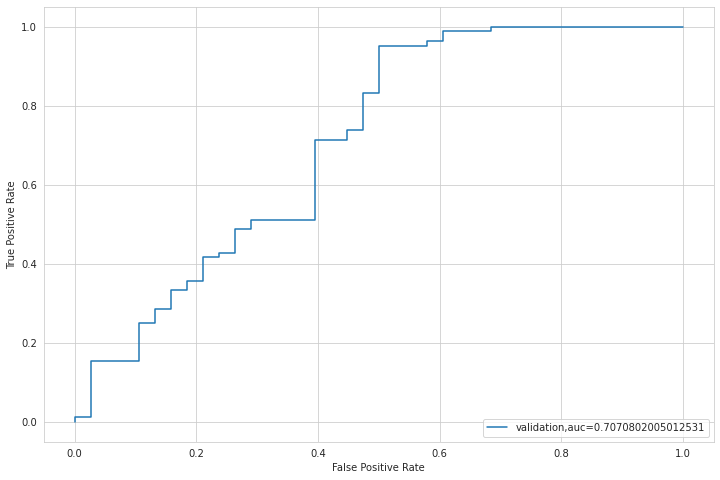

In [442]:
from sklearn import metrics 
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

la precisión de validación media para este modelo resulta ser 0,806
obtuvimos un valor auc de 0.7070
de esta presentación obtuvimos una precisión de 0.78 en la clasificación. Ahora intentaremos mejorar esta precisión utilizando diferentes enfoques.


In [443]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Credit_History_0.0', 'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'income_bin_average',
       'income_bin_high', 'income_bin_low', 'income_bin_very high',
       'LoanAmount_bin_average', 'LoanAmount_bin_high', 'LoanAmount_bin_low'],
      dtype='object')

In [444]:
# entrenamiento
train["total_income"]=train['ApplicantIncome']+train["CoapplicantIncome"]
#testeo
test["total_income"]=test['ApplicantIncome']+test["CoapplicantIncome"]
#
#---------------------#
#---------------------#
print("cantidad variables train",len(train.columns))
print("cantidad variables test",len(test.columns))

cantidad variables train 31
cantidad variables test 30


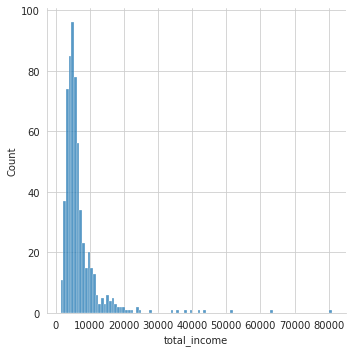

In [445]:
sns.displot(train['total_income'])

podemos ver que está desplazada hacia la izquierda. La distribución está sesgada hacia la derecha. Entonces, tomemos la transformación logarítmica para que la distribución sea normal.

cantidad variables train 32
cantidad variables test 31


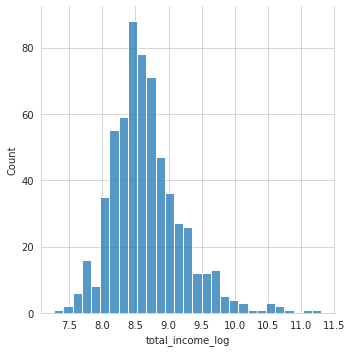

In [446]:
# entrenamiento
train["total_income_log"]=np.log(train['total_income'] )
#testeo
test["total_income_log"]=np.log(test['total_income'] )
#
sns.displot(train['total_income_log'])
#-----------#
#-----------#
print("cantidad variables train",len(train.columns))
print("cantidad variables test",len(test.columns))

ahora la distribución parece mucho más cercana a lo normal y el efecto de los valores extremos ha disminuido significativamente. Vamos a crear la función EMI ahora

cantidad variables train 33
cantidad variables test 32


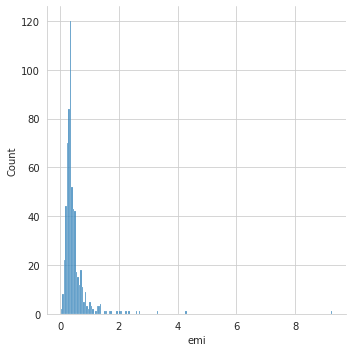

In [447]:
# entrenamiento
train["emi"]=train["LoanAmount"]/train["Loan_Amount_Term"]
#testeo
test["emi"]=test["LoanAmount"]/test["Loan_Amount_Term"]
#
sns.displot(train['emi'])
#------------#
#------------#
print("cantidad variables train",len(train.columns))
print("cantidad variables test",len(test.columns))

vamos a crear la función de ingresos de saldo ahora y verifiquemos su distribución

cantidad variables train 34
cantidad variables test 33


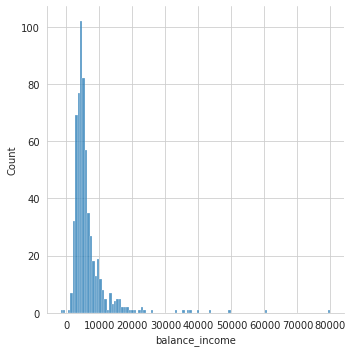

In [448]:
# entrenamiento
train["balance_income"]=train["total_income"]-train["emi"]*1000
#testeo
test["balance_income"]=test["total_income"]-test["emi"]*1000

sns.displot(train['balance_income'])
#------------#
#------------#
print("cantidad variables train",len(train.columns))
print("cantidad variables test",len(test.columns))

#### Modelos

##### Regresion Logistica
- Para **Kfolds** y para la **curva roc** se utilizan los mismo insumos **(x_entrenamiento,y_entrenamiento).**

In [449]:
from sklearn.linear_model import LogisticRegression

In [450]:
len(x_entrenamiento.columns)

29

In [451]:
print("cantidad variables train",len(train.columns))# tiene la target
print("cantidad variables test",len(test.columns))# no tiene la target

cantidad variables train 34
cantidad variables test 33


In [452]:
x_entrenamiento=train.drop(columns=['Loan_Status'],axis=1)
y_entrenamiento=train.Loan_Status

In [453]:
print("cantidad variables train",len(train.columns))
print("cantidad variables test",len(test.columns))
#
print("cantidad variables x_entrenamiento",len(x_entrenamiento.columns))

cantidad variables train 34
cantidad variables test 33
cantidad variables x_entrenamiento 33


In [454]:
#-----------------#
# particion 
#-----------------#
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_entrenamiento,y_entrenamiento,test_size=0.3)
logit = LogisticRegression(random_state=2022) 
logit.fit(x_train,y_train)

LogisticRegression(random_state=2022)

In [455]:

# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=logit.predict(x_train) # Prediccion sobre el train
y_pred_test= logit.predict(x_test) # Prediccion sobre el test
logit_acc_score=accuracy_score(y_test,y_pred_test)

In [456]:
from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[ 56  70]
 [  9 294]]
Matriz confusion: Test
[[ 23  43]
 [  4 115]]
Accuracy: Train
0.8158508158508159
Accuracy: Test
0.745945945945946
Precision: Train
0.8076923076923077
Precision: Test
0.7278481012658228
Recall: Train
0.9702970297029703
Recall: Test
0.9663865546218487


###### kfolds:
**NOTA** : **x_train,x_test,y_train,y_test=train_test_split(x_entrenamiento,y_entrenamiento,test_size=0.3)** 
- Se juega con  **"x_entrenamiento ,y_entrenamiento"** , no se juega con **x_train,x_test,y_train,y_test**   

In [457]:
len(x_entrenamiento)#614

614

In [458]:
from sklearn.model_selection import StratifiedKFold
i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x_entrenamiento,y_entrenamiento):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl=x_entrenamiento.iloc[train_index],x_entrenamiento.iloc[test_index]
  ytr,yvl=y_entrenamiento.iloc[train_index],y_entrenamiento.iloc[test_index]
  logit=LogisticRegression(random_state=2022)
  logit.fit(xtr,ytr)
  pred_test=logit.predict(xvl)
  score=accuracy_score(yvl,pred_test)
  print("accuracy_score",score)
  i+=1 
  pred_test=logit.predict(test)
  lr_predict=logit.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.7804878048780488

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7786885245901639


In [459]:
print("------antes------")
print("x_entrenamiento:",len(x_entrenamiento))#614
print("------despues------")
print("5 kapas de :",len(lr_predict),"observaciones")#122  se debe kfolds = 5
print("122*5:",122*5)

------antes------
x_entrenamiento: 614
------despues------
5 kapas de : 122 observaciones
122*5: 610


###### la curva roc: 
insumo la salida de **kfolds**: "yvl" , "lgbm_predict"

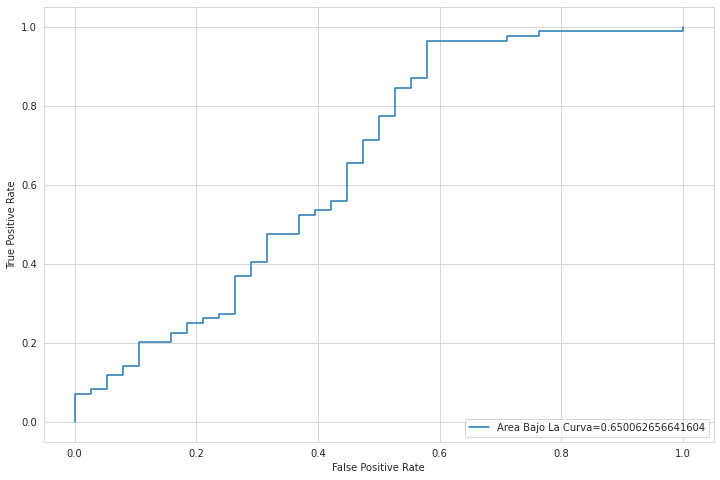

In [460]:
from sklearn import metrics 
fpr,tpr,_=metrics.roc_curve(yvl,lr_predict)
auc=metrics.roc_auc_score(yvl,lr_predict)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Area Bajo La Curva="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

##### Random Forest
- Para **Kfolds** y para la **curva roc** se utilizan los mismo insumos **(x_entrenamiento,y_entrenamiento).**

In [461]:
#---------#
# modelos #
#---------#
from sklearn.ensemble import RandomForestClassifier

In [462]:
len(x_entrenamiento.columns)

33

In [463]:
print("cantidad variables train",len(train.columns))# tiene la target
print("cantidad variables test",len(test.columns))# no tiene la target

cantidad variables train 34
cantidad variables test 33


In [464]:
x_entrenamiento=train.drop(columns=['Loan_Status'],axis=1)
y_entrenamiento=train.Loan_Status

In [465]:
print("cantidad variables train",len(train.columns))
print("cantidad variables test",len(test.columns))
#
print("cantidad variables x_entrenamiento",len(x_entrenamiento.columns))

cantidad variables train 34
cantidad variables test 33
cantidad variables x_entrenamiento 33


In [466]:
#-----------------#
# particion 
#-----------------#
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_entrenamiento,y_entrenamiento,test_size=0.3)

In [467]:
rdn = RandomForestClassifier(random_state=2022) 
rdn.fit(x_train,y_train)
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=rdn.predict(x_train) # Prediccion sobre el train
y_pred_test= rdn.predict(x_test) # Prediccion sobre el test
#
rdn_acc_score=accuracy_score(y_test,y_pred_test)

In [468]:
from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[135   0]
 [  0 294]]
Matriz confusion: Test
[[ 27  30]
 [  9 119]]
Accuracy: Train
1.0
Accuracy: Test
0.7891891891891892
Precision: Train
1.0
Precision: Test
0.7986577181208053
Recall: Train
1.0
Recall: Test
0.9296875


###### kfolds: 
**NOTA** : **x_train,x_test,y_train,y_test=train_test_split(x_entrenamiento,y_entrenamiento,test_size=0.3)** 
- Se juega con  **"x_entrenamiento ,y_entrenamiento"** , no se juega con **x_train,x_test,y_train,y_test**   

In [469]:
from sklearn.model_selection import StratifiedKFold
i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x_entrenamiento,y_entrenamiento):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl=x_entrenamiento.iloc[train_index],x_entrenamiento.iloc[test_index]
  ytr,yvl=y_entrenamiento.iloc[train_index],y_entrenamiento.iloc[test_index]
  rdn=RandomForestClassifier(random_state=2022)
  rdn.fit(xtr,ytr)
  pred_test=rdn.predict(xvl)
  score=accuracy_score(yvl,pred_test)
  print("accuracy_score",score)
  i+=1 
  pred_test=rdn.predict(test)
  rdn_predict=rdn.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7622950819672131


In [470]:
print("------antes------")
print("x_entrenamiento:",len(x_entrenamiento))#614
print("------despues------")
print("5 kapas de :",len(rdn_predict),"observaciones")#122  se debe kfolds = 5
print("122*5:",122*5)

------antes------
x_entrenamiento: 614
------despues------
5 kapas de : 122 observaciones
122*5: 610


###### la curva roc: 
insumo la salida de **kfolds**: "yvl" , "lgbm_predict"

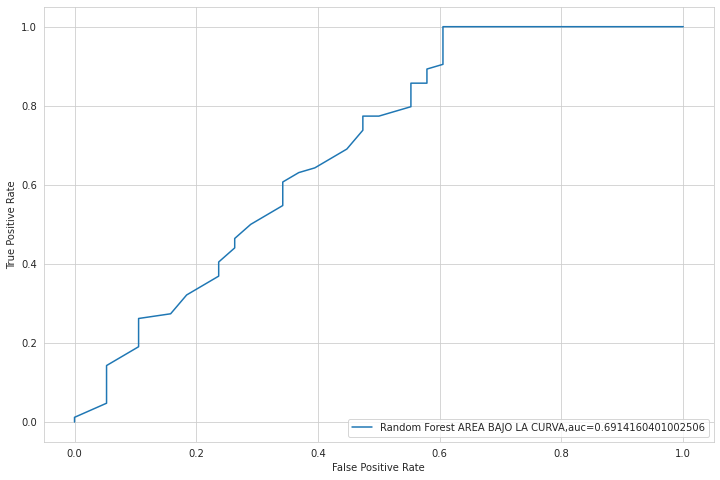

In [471]:
from sklearn import metrics 
fpr,tpr,_=metrics.roc_curve(yvl,rdn_predict)
auc=metrics.roc_auc_score(yvl,rdn_predict)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Random Forest AREA BAJO LA CURVA, auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

##### lightgbm 
- Para **Kfolds** y para la **curva roc** se utilizan los mismo insumos **(x_entrenamiento,y_entrenamiento).**

In [472]:
#---------#
# modelos #
#---------#
from lightgbm import LGBMClassifier

In [473]:
len(x_entrenamiento.columns)

33

In [474]:
print("cantidad variables train",len(train.columns))# tiene la target
print("cantidad variables test",len(test.columns))# no tiene la target

cantidad variables train 34
cantidad variables test 33


In [475]:
x_entrenamiento=train.drop(columns=['Loan_Status'],axis=1)
y_entrenamiento=train.Loan_Status

In [476]:
print("cantidad variables train",len(train.columns))
print("cantidad variables test",len(test.columns))
#
print("cantidad variables x_entrenamiento",len(x_entrenamiento.columns))

cantidad variables train 34
cantidad variables test 33
cantidad variables x_entrenamiento 33


In [477]:
#-----------------#
# particion 
#-----------------#
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_entrenamiento,y_entrenamiento,test_size=0.3)

In [478]:
lgbm = LGBMClassifier(random_state=2022) 
lgbm.fit(x_train,y_train)
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=lgbm.predict(x_train) # Prediccion sobre el train
y_pred_test= lgbm.predict(x_test) # Prediccion sobre el test
#
lgbm_acc_score=accuracy_score(y_test,y_pred_test)

In [479]:
from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[139   1]
 [  0 289]]
Matriz confusion: Test
[[ 33  19]
 [ 15 118]]
Accuracy: Train
0.9976689976689976
Accuracy: Test
0.8162162162162162
Precision: Train
0.996551724137931
Precision: Test
0.8613138686131386
Recall: Train
1.0
Recall: Test
0.8872180451127819


###### kfolds:
**NOTA** : **x_train,x_test,y_train,y_test=train_test_split(x_entrenamiento,y_entrenamiento,test_size=0.3)** 
- Se juega con  **"x_entrenamiento ,y_entrenamiento"** , no se juega con **x_train,x_test,y_train,y_test**   

In [480]:
from sklearn.model_selection import StratifiedKFold
i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x_entrenamiento,y_entrenamiento):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl=x_entrenamiento.iloc[train_index],x_entrenamiento.iloc[test_index]
  ytr,yvl=y_entrenamiento.iloc[train_index],y_entrenamiento.iloc[test_index]
  lgbm=LGBMClassifier(random_state=2022)
  lgbm.fit(xtr,ytr)
  pred_test=lgbm.predict(xvl)
  score=accuracy_score(yvl,pred_test)
  print("accuracy_score",score)
  i+=1 
  pred_test=lgbm.predict(test)
  lgbm_predict=lgbm.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7479674796747967

2 of kfold 5
accuracy_score 0.7967479674796748

3 of kfold 5
accuracy_score 0.7886178861788617

4 of kfold 5
accuracy_score 0.7479674796747967

5 of kfold 5
accuracy_score 0.7459016393442623


In [481]:
print("------antes------")
print("x_entrenamiento:",len(x_entrenamiento))#614
print("------despues------")
print("5 kapas de :",len(lgbm_predict),"observaciones")#122  se debe kfolds = 5
print("122*5:",122*5)

------antes------
x_entrenamiento: 614
------despues------
5 kapas de : 122 observaciones
122*5: 610


###### la curva roc: 
insumo la salida de **kfolds**: "yvl" , "lgbm_predict"

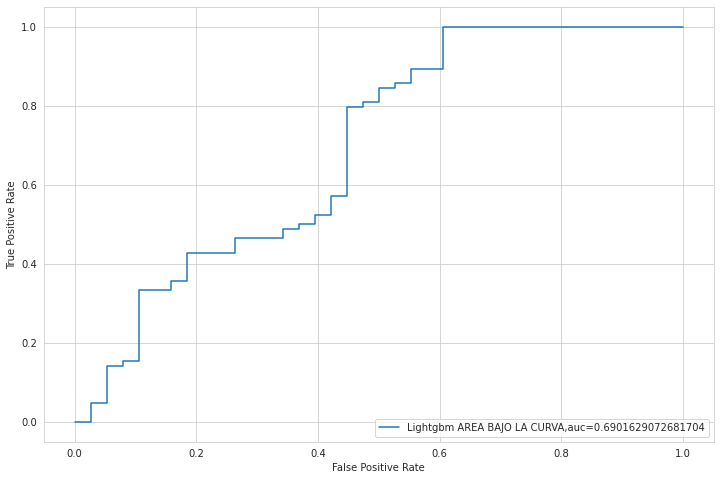

In [482]:
from sklearn import metrics 
fpr,tpr,_=metrics.roc_curve(yvl,lgbm_predict)#85 ,85
auc=metrics.roc_auc_score(yvl,lgbm_predict)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Lightgbm AREA BAJO LA CURVA, auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

#### Conclusion : Random Forest es el mejor!

#### Grid Search- Random Forest

**help(rdn)**

RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)


In [ ]:
help(rdn)

In [488]:
                                  #--------#
#---------------------------------# paso 1 #------------------------------------
                                  #--------#
#-------------#
# diccionario #
#-------------#
# numero de arboles en bosque aleatorio
n_estimators=[100,300,400,500,600]
# proporcion de variables que va en cada arbol
max_depth=[3,4,5,6]
# maxima features
max_features=["sqrt","auto"]
# max_leaf_nodes
criterion=['entropy',"gini"]
# numero maximo de nodos terminales
max_leaf_nodes=[10,20,25,30]

#~~~~~~~~~~~~~~~~~~~~~#
# creando diccionario #
#~~~~~~~~~~~~~~~~~~~~~#
diccionario={
'n_estimators':n_estimators,
  'max_depth':max_depth,
 'max_features':max_features,
 'criterion':criterion,
 'max_leaf_nodes':max_leaf_nodes
}

In [489]:
                                  #--------#
#---------------------------------# paso 2 #------------------------------------
                                  #--------#
X_res2, y_res2=x_train,y_train
from sklearn.model_selection import GridSearchCV
# Creando modelo base

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# el modelo es RANDOM FOREST "rdn" #
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

# Instanciamos el modelo 
grid_search = GridSearchCV(estimator = rdn, param_grid = diccionario, cv = 5, n_jobs = -1, verbose = 2,scoring='roc_auc')
# Fit the grid search to the data
grid_search.fit(X_res2, y_res2)
grid_search.best_params_


Fitting 5 folds for each of 320 candidates, totalling 1600 fits


{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': 10,
 'n_estimators': 600}

In [509]:
                                  #--------#
#---------------------------------# paso 3 #------------------------------------
                                  #--------#
from sklearn.metrics import confusion_matrix
y_pred_train=grid_search.predict(X_res2) # Prediccion sobre el train
y_pred_test=grid_search.predict(x_test) # Prediccion sobre el test
#
gridsearch_acc_score=accuracy_score(y_test,y_pred_test)

In [510]:
                                  #--------#
#---------------------------------# paso 4 #------------------------------------
                                  #--------#

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_res2,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_res2,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_res2,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_res2,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[ 66  74]
 [  5 284]]
Matriz confusion: Test
[[ 26  26]
 [  1 132]]
Accuracy: Train
0.8158508158508159
Accuracy: Test
0.8540540540540541
Precision: Train
0.7932960893854749
Precision: Test
0.8354430379746836
Recall: Train
0.9826989619377162
Recall: Test
0.9924812030075187


###### kfolds:
**NOTA** : **x_train,x_test,y_train,y_test=train_test_split(x_entrenamiento,y_entrenamiento,test_size=0.3)** 
- Se juega con  **"x_entrenamiento ,y_entrenamiento"** , no se juega con **x_train,x_test,y_train,y_test**   


In [501]:
from sklearn.model_selection import StratifiedKFold
i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x_entrenamiento,y_entrenamiento):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl=x_entrenamiento.iloc[train_index],x_entrenamiento.iloc[test_index]
  ytr,yvl=y_entrenamiento.iloc[train_index],y_entrenamiento.iloc[test_index]
  
  #lgbm=LGBMClassifier(random_state=2022)
  #----------------------------#
  # El modelo es "grid_search" #
  #----------------------------#
  grid_search.fit(xtr,ytr)
  pred_test=grid_search.predict(xvl)
  score=accuracy_score(yvl,pred_test)
  print("accuracy_score",score)
  i+=1 
  pred_test=grid_search.predict(test)
  grid_search_predict=grid_search.predict_proba(xvl)[:,1]


1 of kfold 5
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
accuracy_score 0.8211382113821138

2 of kfold 5
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
accuracy_score 0.8292682926829268

3 of kfold 5
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
accuracy_score 0.7886178861788617

4 of kfold 5
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
accuracy_score 0.8048780487804879

5 of kfold 5
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
accuracy_score 0.7950819672131147


In [503]:
print("------antes------")
print("x_entrenamiento:",len(x_entrenamiento))#614
print("------despues------")
print("5 kapas de :",len(grid_search_predict),"observaciones")#122  se debe kfolds = 5
print("122*5:",122*5)


------antes------
x_entrenamiento: 614
------despues------
5 kapas de : 122 observaciones
122*5: 610


###### la curva roc: 
insumo la salida de **kfolds**: "yvl" , "grid_search_predict"

In [506]:
len(yvl)

122

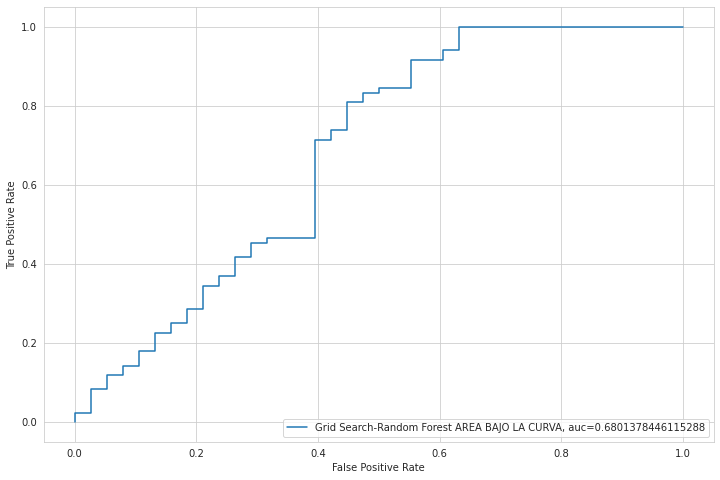

In [504]:
from sklearn import metrics 
fpr,tpr,_=metrics.roc_curve(yvl,grid_search_predict)
auc=metrics.roc_auc_score(yvl,grid_search_predict)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Grid Search-Random Forest AREA BAJO LA CURVA, auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

##### Guardamos el Modelo Grid Search-Random Forest

In [495]:
#-----------------------------------------------#
# guardamos el modelo grid search-Random Forest #
#-----------------------------------------------#

# paso 1
#~~~~~~~
import os
os.chdir('/content')

# paso 2
#~~~~~~~
import pickle


In [498]:
os.getcwd()

'/content'

In [496]:
# paso 3
#~~~~~~~
#creamos el modelo con GridSearchCV
grid_search_rdn=grid_search.best_estimator_
grid_search_rdn.fit(X_res2, y_res2)

RandomForestClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=10,
                       n_estimators=600, random_state=2022)

In [497]:
# paso 4
#~~~~~~~
#guardamos el modelo en el disco duro
archivo1="modelo_grid_search_rdn"
#volvamos toda la informacion del modelo al archivo pkl
#del disco duro
with open(archivo1,"wb") as file:
    pickle.dump(grid_search_rdn,file)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Se guardo el modelo "modelo_grid_search_rdn" #
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

#### Combinacion de modelos - Stacking

In [323]:
#---------------------#
# regresion logistica #
#---------------------#

lr_predict=logit.predict_proba(xvl)[:,1]


#----------#
# lightgbm #
#----------#

lgbm_predict=lgbm.predict_proba(xvl)[:,1]



#---------------#
# random forest #
#---------------#

rdn_predict=rdn.predict_proba(xvl)[:,1]

#---------------------------#
# Grid Search random forest #
#---------------------------#

grid_search_predict=grid_search.predict_proba(xvl)[:,1]

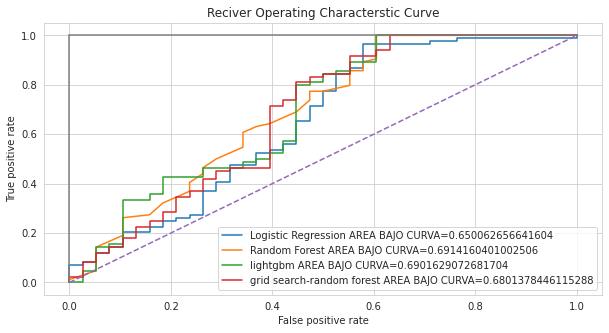

In [508]:
                              #--------#
#-----------------------------# paso 1 #-------------------------------
                              #--------#
from sklearn.metrics import roc_curve 
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(yvl,lr_predict)
rdn_false_positive_rate,rdn_true_positive_rate,rdn_threshold = roc_curve(yvl,rdn_predict)                                                             
lgbm_false_positive_rate,lgbm_true_positive_rate,lgbm_threshold = roc_curve(yvl,lgbm_predict)
gridsearch_false_positive_rate,gridsearch_true_positive_rate,gridsearch_threshold = roc_curve(yvl,grid_search_predict)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')

# Hay 4 modelos:
#~~~~~~~~~~~~~~~

auc_logit=metrics.roc_auc_score(yvl,lr_predict)
auc_rdn=metrics.roc_auc_score(yvl,rdn_predict)
auc_lgbm=metrics.roc_auc_score(yvl,lgbm_predict)
auc_gridsearch=metrics.roc_auc_score(yvl,grid_search_predict)

plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression AREA BAJO CURVA='+str(auc_logit))
plt.plot(rdn_false_positive_rate,rdn_true_positive_rate,label='Random Forest AREA BAJO CURVA='+str(auc_rdn))
plt.plot(lgbm_false_positive_rate,lgbm_true_positive_rate,label='lightgbm AREA BAJO CURVA='+str(auc_lgbm))
plt.plot(gridsearch_false_positive_rate,gridsearch_true_positive_rate,label='grid search-random forest AREA BAJO CURVA='+str(auc_gridsearch))
 
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

**CONCLUSION** : 
- Aplicando kfolds de 5 capas(por cada capa hay 122 observaciones) el modelo mas estable por la metrica **"CURVA ROC"** fue el modelo de **RANDOM FOREST**. 

- Aplicando la metrica **curva roc** sin kfolds, el mejor modelo es **RANDOM FOREST**.

#### Stacking

In [512]:
                                  #--------#
#---------------------------------# paso 1 #------------------------------------
                                  #--------#

# Hay 3 modelos:
#~~~~~~~~~~~~~~~

model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',"Lightgbm","grid search-Random Forest"], 'Accuracy_testeo': [logit_acc_score*100,
                    rdn_acc_score*100,lgbm_acc_score*100,gridsearch_acc_score*100]})
model_ev

,Model,Accuracy_testeo
0,Logistic Regression,74.594595
1,Random Forest,78.918919
2,Lightgbm,81.621622
3,grid search-Random Forest,85.405405


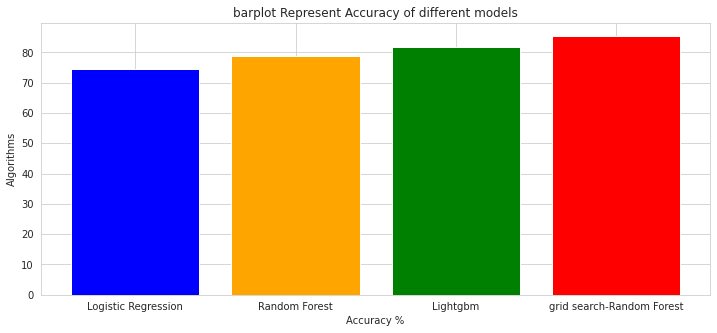

In [541]:
                                  #--------#
#---------------------------------# paso 3 #------------------------------------
                                  #--------#

# Graficos de barras de los accuracy de los 6 modelos:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

colors = ['blue','orange','green',"red"]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy_testeo'],color = colors)
plt.show()


In [518]:
pip install mlrose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=9950dec3fe29eb0e137940635bf319596a668ff8643e4148710d7f25b7f985f4
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [519]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [520]:
from sklearn.externals import six

In [521]:
from mlxtend.classifier import StackingCVClassifier

In [525]:
                                  #--------#
#---------------------------------# paso 4 #------------------------------------
                                  #--------#

scv=StackingCVClassifier(classifiers=[rdn,grid_search],meta_classifier= rdn)
scv.fit(x_train.values, y_train.values)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


StackingCVClassifier(classifiers=[RandomForestClassifier(random_state=2022),
                                  GridSearchCV(cv=5,
                                               estimator=RandomForestClassifier(random_state=2022),
                                               n_jobs=-1,
                                               param_grid={'criterion': ['entropy',
                                                                         'gini'],
                                                           'max_depth': [3, 4,
                                                                         5, 6],
                                                           'max_features': ['sqrt',
                                                                            'auto'],
                                                           'max_leaf_nodes': [10,
                                                                              20,
                                                      

##### Guardando Modelo Stacking = Random Forest + GridSearch Random Forest

In [526]:
#-----------------------------------------------#
# guardamos el modelo grid search-Random Forest #
#-----------------------------------------------#

# paso 1
#~~~~~~~
import os
os.chdir('/content')

# paso 2
#~~~~~~~
import pickle


os.getcwd()


'/content'

In [533]:
print(len(x_train.values))
print(len(x_entrenamiento.values))
print("429/614:",429/614)

429
614
429/614: 0.6986970684039088


In [530]:
# paso 3
#~~~~~~~
#creamos el modelo con GridSearchCV
scv



# paso 4
#~~~~~~~
#guardamos el modelo en el disco duro
archivo2="modelo_stacking_rdn_+_gridsearchRDN"
#volvamos toda la informacion del modelo al archivo pkl
#del disco duro
with open(archivo2,"wb") as file:
    pickle.dump(scv,file)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Se guardo el modelo "modelo_stacking_rdn_+_gridsearchRDN" #
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

In [534]:
                                  #--------#
#---------------------------------# paso 5 #------------------------------------
                                  #--------#
from sklearn.metrics import classification_report
# Matrix de confusion:
#~~~~~~~~~~~~~~~~~~~~~

scv_predicted = scv.predict(x_test.values)
scv_conf_matrix = confusion_matrix(y_test.values, scv_predicted)
scv_acc_score = accuracy_score(y_test.values, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test.values,scv_predicted))

confussion matrix
[[ 25  27]
 [  3 130]]


Accuracy of StackingCVClassifier: 83.78378378378379 

              precision    recall  f1-score   support

           0       0.89      0.48      0.62        52
           1       0.83      0.98      0.90       133

    accuracy                           0.84       185
   macro avg       0.86      0.73      0.76       185
weighted avg       0.85      0.84      0.82       185



In [535]:
len(yvl)

122

In [537]:
len(xvl)

122

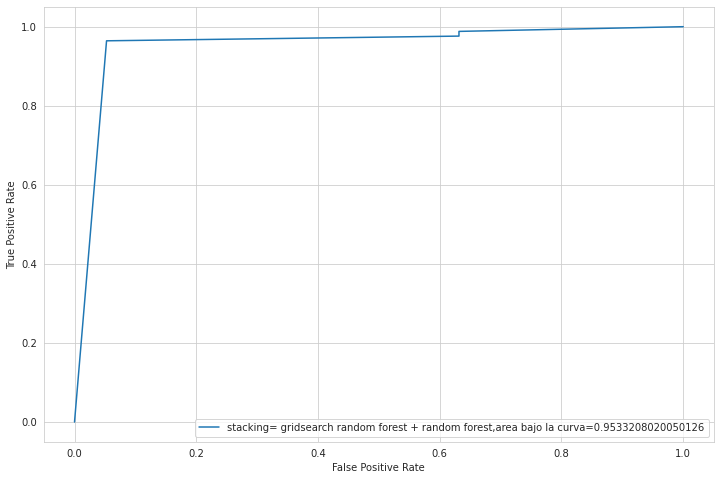

In [542]:
pred=scv.predict_proba(xvl)[:,1]                                      
                                       #############
                                       # curva roc #
                                       #############
from sklearn import metrics 
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="stacking= gridsearch random forest + random forest,area bajo la curva="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

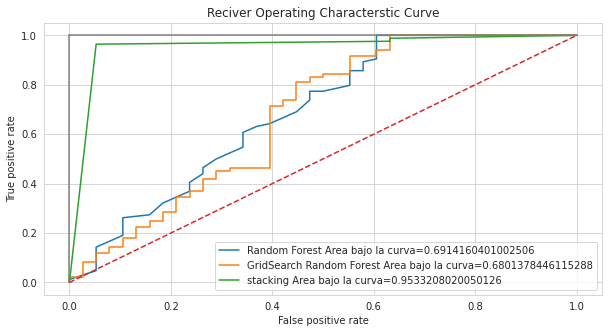

In [540]:
                                  #--------#
#---------------------------------# paso 6 #------------------------------------
                                  #--------#

#insumo :pred=scv.predict_proba(xvl)[:,1]     #xvl tiene 122 observaciones en una capa 

#-------------------------------------------------------------------------------
#modelos:
# random forest = rdn
# grid search   = grid_search       (tuneando los parametros de random forest)
# stacking      = scv                  (rdn + grid search) 
#-------------------------------------------------------------------------------

# Curva Roc:
#~~~~~~~~~~~

#----------------------#
# modelo random forest #
#----------------------#

rdn_pred=rdn.predict_proba(xvl)[:,1]   
rdn_false_positive_rate,rdn_true_positive_rate,rdn_threshold = roc_curve(yvl,rdn_pred)                                                             
auc_rdn=metrics.roc_auc_score(yvl,rdn_pred) 

#---------------------------------#
# modelo gridsearch random forest #  
#---------------------------------#
grid_search_predicted=grid_search.predict_proba(xvl)[:,1]  
grid_search_false_positive_rate,grid_search_true_positive_rate,grid_search_threshold = roc_curve(yvl,grid_search_predicted) 
auc_grid_search=metrics.roc_auc_score(yvl,grid_search_predicted) 

#-----------------#
# modelo stacking #random forest + gridsearch random forest
#-----------------#
scv_predicted=scv.predict_proba(xvl)[:,1]  
scv_false_positive_rate,scv_true_positive_rate,scv_threshold = roc_curve(yvl,scv_predicted) 
auc_scv=metrics.roc_auc_score(yvl,scv_predicted) 


 

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')

# random forest
plt.plot(rdn_false_positive_rate,rdn_true_positive_rate,label='Random Forest Area bajo la curva='+str(auc_rdn))

#grid search
plt.plot(grid_search_false_positive_rate,grid_search_true_positive_rate,label='GridSearch Random Forest Area bajo la curva='+str(auc_grid_search))

#stacking
plt.plot(scv_false_positive_rate,scv_true_positive_rate,label='stacking Area bajo la curva='+str(auc_scv))
 
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [568]:
print("--------------------todo la data de entrenamiento---------------------")
print('x_entrenamiento',len(x_entrenamiento))
print('y_entrenamiento',len(y_entrenamiento))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~matrix de confusion~~~~~~~~~~~~~~~~~~~~~~')
print("70 y 30 ")
print("x_train",len(x_train))
print("y_train",len(y_train))
print("x_test",len(x_test))
print("y_test",len(y_test))
print('~~~~~~~~~~~~~~Particionamiento~~kfolds~~curva_roc~~~~~~~~~~~~~~~~~~~~~')
print("80 y 20 ")
print("xvl",len(xvl),"por cada capa,en total hay 5 capas")
print("yvl",len(yvl),"por cada capa,en total hay 5 capas")
print("xtr",len(xtr),"por cada capa,en total hay 5 capas")
print("ytr",len(ytr),"por cada capa,en total hay 5 capas")

print("-------------------------todo la data de testeo-----------------------")
print("test",len(test))
print('**************')

--------------------todo la data de entrenamiento---------------------
x_entrenamiento 614
y_entrenamiento 614
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~matrix de confusion~~~~~~~~~~~~~~~~~~~~~~
70 y 30 
x_train 429
y_train 429
x_test 185
y_test 185
~~~~~~~~~~~~~~Particionamiento~~kfolds~~curva_roc~~~~~~~~~~~~~~~~~~~~~
80 y 20 
xvl 122 por cada capa,en total hay 5 capas
yvl 122 por cada capa,en total hay 5 capas
xtr 492 por cada capa,en total hay 5 capas
ytr 492 por cada capa,en total hay 5 capas
-------------------------todo la data de testeo-----------------------
test 367
**************


In [549]:
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=scv.predict(x_train) # Prediccion sobre el train
y_pred_test= scv.predict(x_test) # Prediccion sobre el test


#--------------------------------------------------------------#


# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[ 63  77]
 [  5 284]]
Matriz confusion: Test
[[ 25  27]
 [  3 130]]
Accuracy: Train
0.8088578088578089
Accuracy: Test
0.8378378378378378
Precision: Train
0.7867036011080333
Precision: Test
0.8280254777070064
Recall: Train
0.9826989619377162
Recall: Test
0.9774436090225563


#### Importancia de las variables
 Modelo Ganador es STACKING   >>  scv


In [575]:
print("xvl",len(xvl))
print("x_entrenamiento",len(x_entrenamiento.columns))
print("x_test",len(x_test))

xvl 122
x_entrenamiento 33
x_test 185


In [581]:
y_predicho=scv.predict(x_test)
y_predicho=pd.DataFrame(y_predicho)
y_predicho.head(2)

,0
0,0
1,1


In [586]:
len(x_test)

185

In [587]:
len(y_test)

185

In [588]:
len(y_predicho)

185

In [607]:
y_predicho.columns=["y_predicho"]

In [602]:
y_test.reset_index()

,index,Loan_Status
0,396,0
1,608,1
2,526,1
3,266,1
4,74,1
...,...,...
180,85,1
181,215,1
182,606,1
183,310,1


In [603]:
x_test.reset_index()

,index,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,income_bin_high,income_bin_low,income_bin_very high,LoanAmount_bin_average,LoanAmount_bin_high,LoanAmount_bin_low,total_income,total_income_log,emi,balance_income
0,396,3180,0.0,71.0,360.0,1.851258,1,0,1,0,...,0,0,0,0,0,1,3180.0,8.064636,0.197222,2982.777778
1,608,3232,1950.0,108.0,360.0,2.033424,0,1,0,1,...,0,0,0,1,0,0,5182.0,8.552946,0.300000,4882.000000
2,526,3775,0.0,110.0,360.0,2.041393,0,1,0,1,...,0,0,0,1,0,0,3775.0,8.236156,0.305556,3469.444444
3,266,4708,1387.0,150.0,360.0,2.176091,0,1,0,1,...,1,0,0,1,0,0,6095.0,8.715224,0.416667,5678.333333
4,74,5266,1774.0,187.0,360.0,2.271842,0,1,0,1,...,1,0,0,1,0,0,7040.0,8.859363,0.519444,6520.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,85,2366,2531.0,136.0,360.0,2.133539,0,1,1,0,...,0,1,0,1,0,0,4897.0,8.496378,0.377778,4519.222222
181,215,3850,983.0,100.0,360.0,2.000000,0,1,0,1,...,0,0,0,0,0,1,4833.0,8.483223,0.277778,4555.222222
182,606,3400,2500.0,173.0,360.0,2.238046,0,1,0,1,...,0,0,0,1,0,0,5900.0,8.682708,0.480556,5419.444444
183,310,2917,0.0,84.0,360.0,1.924279,1,0,1,0,...,0,0,0,0,0,1,2917.0,7.978311,0.233333,2683.666667


In [608]:
data_final=pd.concat([x_test.reset_index(),y_predicho,y_test.reset_index()],axis=1)

In [609]:
data_final.shape

(185, 37)

In [610]:
data_final.head()

,index,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,LoanAmount_bin_average,LoanAmount_bin_high,LoanAmount_bin_low,total_income,total_income_log,emi,balance_income,y_predicho,index,Loan_Status
0,396,3180,0.0,71.0,360.0,1.851258,1,0,1,0,...,0,0,1,3180.0,8.064636,0.197222,2982.777778,0,396,0
1,608,3232,1950.0,108.0,360.0,2.033424,0,1,0,1,...,1,0,0,5182.0,8.552946,0.300000,4882.000000,1,608,1
2,526,3775,0.0,110.0,360.0,2.041393,0,1,0,1,...,1,0,0,3775.0,8.236156,0.305556,3469.444444,1,526,1
3,266,4708,1387.0,150.0,360.0,2.176091,0,1,0,1,...,1,0,0,6095.0,8.715224,0.416667,5678.333333,1,266,1
4,74,5266,1774.0,187.0,360.0,2.271842,0,1,0,1,...,1,0,0,7040.0,8.859363,0.519444,6520.555556,1,74,1


In [621]:
rdn.feature_importances_

array([0.06932476, 0.04249432, 0.06217252, 0.01732551, 0.06161666,
       0.00815667, 0.00592866, 0.01250835, 0.01247851, 0.01137561,
       0.00849695, 0.00660954, 0.0049694 , 0.00992255, 0.01006298,
       0.00766035, 0.00785936, 0.13079916, 0.14227835, 0.0144062 ,
       0.01545261, 0.01099459, 0.00899842, 0.01072989, 0.00624052,
       0.00423618, 0.0085382 , 0.00378129, 0.00381847, 0.06937879,
       0.0735281 , 0.06201187, 0.0758447 ])

###### Exportando la data_final

In [650]:
os.getcwd()

'/content'

In [651]:
data_final.to_csv("data_final.csv")

###### Grafico Gender_Female

----------Grafico Data Real----------


Loan_Status,0,1
Gender_Female,,
0,0.267606,0.732394
1,0.325581,0.674419


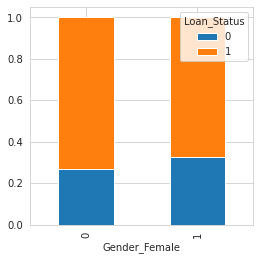

In [619]:
print("----------Grafico Data Real----------")
#----------------------------#
# GRAFICO DE BARRAS APILADAS #
#----------------------------#
                   #var cualitativa   #var cualitativa
Gender=pd.crosstab(data_final["Gender_Female"],data_final["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

#--------#
# filtro :
#--------#

#tabla

Gender.div(Gender.sum(1).astype(float),axis=0)

----------Grafico Modelo----------


y_predicho,0,1
Gender_Female,,
0,0.140845,0.859155
1,0.186047,0.813953


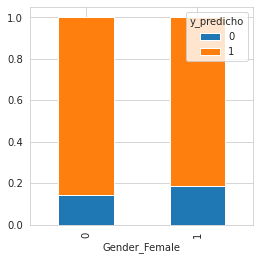

In [618]:
print("----------Grafico Modelo----------")
#----------------------------#
# GRAFICO DE BARRAS APILADAS #
#----------------------------#
                   #var cualitativa   #var cualitativa
Gender=pd.crosstab(data_final["Gender_Female"],data_final["y_predicho"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

#--------#
# filtro :
#--------#

#tabla

Gender.div(Gender.sum(1).astype(float),axis=0)

In [624]:
importancia=list(rdn.feature_importances_)
len(importancia)

33

In [625]:
len(xvl.columns)

33

In [ ]:

tablita = pd.DataFrame({'Model': xvl.columns, 'importancia': importancia})
tablita.sort_values('importancia')

In [ ]:
tablita.sort_values('importancia',ascending=False)

###### Grafico Credit_History_1.0

In [ ]:
data_final.columns

----------Grafico Data Real----------


Loan_Status,0,1
Credit_History_1.0,,
0,0.961538,0.038462
1,0.169811,0.830189


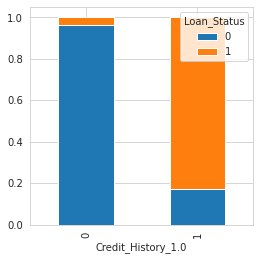

In [632]:
print("----------Grafico Data Real----------")
#----------------------------#
# GRAFICO DE BARRAS APILADAS #
#----------------------------#
                   #var cualitativa   #var cualitativa
Gender=pd.crosstab(data_final["Credit_History_1.0"],data_final["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

#--------#
# filtro :
#--------#

#tabla

Gender.div(Gender.sum(1).astype(float),axis=0)

----------Grafico Modelo----------


y_predicho,0,1
Credit_History_1.0,,
0,1.000000,0.000000
1,0.012579,0.987421


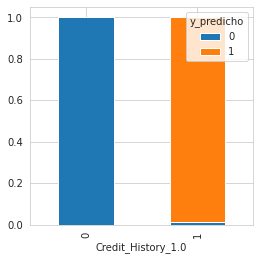

In [633]:
print("----------Grafico Modelo----------")
#----------------------------#
# GRAFICO DE BARRAS APILADAS #
#----------------------------#
                   #var cualitativa   #var cualitativa
Gender=pd.crosstab(data_final["Credit_History_1.0"],data_final["y_predicho"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

#--------#
# filtro :
#--------#

#tabla

Gender.div(Gender.sum(1).astype(float),axis=0)

###### Grafico balance_income

----------Grafico Data Real----------


Loan_Status,0,1
Married_Yes,,
0,0.426230,0.573770
1,0.209677,0.790323


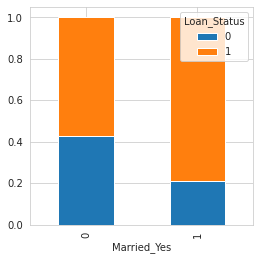

In [635]:
print("----------Grafico Data Real----------")
#----------------------------#
# GRAFICO DE BARRAS APILADAS #
#----------------------------#
                   #var cualitativa   #var cualitativa
Gender=pd.crosstab(data_final["Married_Yes"],data_final["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

#--------#
# filtro :
#--------#

#tabla

Gender.div(Gender.sum(1).astype(float),axis=0)

----------Grafico Modelo----------


y_predicho,0,1
Married_Yes,,
0,0.196721,0.803279
1,0.129032,0.870968


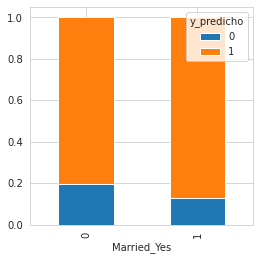

In [636]:
print("----------Grafico Modelo----------")
#----------------------------#
# GRAFICO DE BARRAS APILADAS #
#----------------------------#
                   #var cualitativa   #var cualitativa
Gender=pd.crosstab(data_final["Married_Yes"],data_final["y_predicho"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

#--------#
# filtro :
#--------#

#tabla

Gender.div(Gender.sum(1).astype(float),axis=0)

###### Grafico Property_Area_Semiurban

----------Grafico Data Real----------


Loan_Status,0,1
Property_Area_Semiurban,,
0,0.367925,0.632075
1,0.164557,0.835443


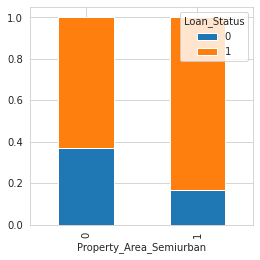

In [637]:
print("----------Grafico Data Real----------")
#----------------------------#
# GRAFICO DE BARRAS APILADAS #
#----------------------------#
                   #var cualitativa   #var cualitativa
Gender=pd.crosstab(data_final["Property_Area_Semiurban"],data_final["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

#--------#
# filtro :
#--------#

#tabla

Gender.div(Gender.sum(1).astype(float),axis=0)

----------Grafico Modelo----------


y_predicho,0,1
Property_Area_Semiurban,,
0,0.179245,0.820755
1,0.113924,0.886076


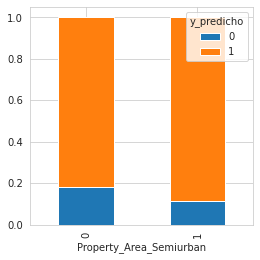

In [638]:
print("----------Grafico Modelo----------")
#----------------------------#
# GRAFICO DE BARRAS APILADAS #
#----------------------------#
                   #var cualitativa   #var cualitativa
Gender=pd.crosstab(data_final["Property_Area_Semiurban"],data_final["y_predicho"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

#--------#
# filtro :
#--------#

#tabla

Gender.div(Gender.sum(1).astype(float),axis=0)


###### Grafico Property_Area_Rural

----------Grafico Data Real----------


Loan_Status,0,1
Property_Area_Rural,,
0,0.232558,0.767442
1,0.392857,0.607143


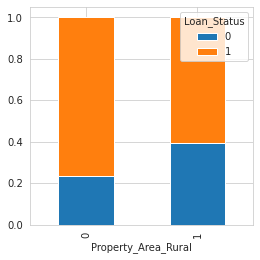

In [639]:
print("----------Grafico Data Real----------")
#----------------------------#
# GRAFICO DE BARRAS APILADAS #
#----------------------------#
                   #var cualitativa   #var cualitativa
Gender=pd.crosstab(data_final["Property_Area_Rural"],data_final["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

#--------#
# filtro :
#--------#

#tabla

Gender.div(Gender.sum(1).astype(float),axis=0)

----------Grafico Modelo----------


y_predicho,0,1
Property_Area_Rural,,
0,0.131783,0.868217
1,0.196429,0.803571


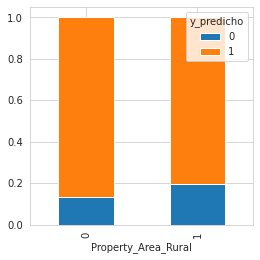

In [640]:
print("----------Grafico Modelo----------")
#----------------------------#
# GRAFICO DE BARRAS APILADAS #
#----------------------------#
                   #var cualitativa   #var cualitativa
Gender=pd.crosstab(data_final["Property_Area_Rural"],data_final["y_predicho"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

#--------#
# filtro :
#--------#

#tabla

Gender.div(Gender.sum(1).astype(float),axis=0)


###### Grafico Dependents_0

----------Grafico Data Real----------


Loan_Status,0,1
Dependents_0,,
0,0.256410,0.743590
1,0.299065,0.700935


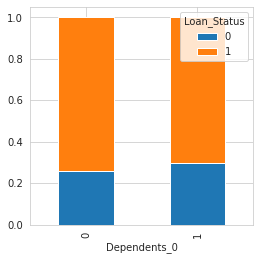

In [641]:
print("----------Grafico Data Real----------")
#----------------------------#
# GRAFICO DE BARRAS APILADAS #
#----------------------------#
                   #var cualitativa   #var cualitativa
Gender=pd.crosstab(data_final["Dependents_0"],data_final["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

#--------#
# filtro :
#--------#

#tabla

Gender.div(Gender.sum(1).astype(float),axis=0)

----------Grafico Modelo----------


y_predicho,0,1
Dependents_0,,
0,0.128205,0.871795
1,0.168224,0.831776


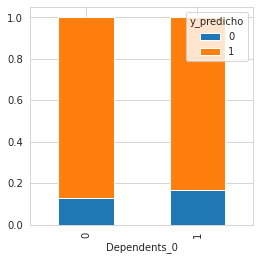

In [642]:
print("----------Grafico Modelo----------")
#----------------------------#
# GRAFICO DE BARRAS APILADAS #
#----------------------------#
                   #var cualitativa   #var cualitativa
Gender=pd.crosstab(data_final["Dependents_0"],data_final["y_predicho"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

#--------#
# filtro :
#--------#

#tabla

Gender.div(Gender.sum(1).astype(float),axis=0)

###### balance_income

------------------Grafico Data Real----------------------


Loan_Status
0    6273.600809
1    5633.671806
Name: balance_income, dtype: float64

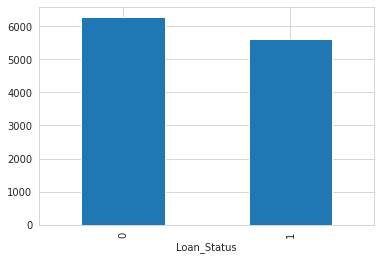

In [645]:
print("------------------Grafico Data Real----------------------")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
                       # variable numericas independiente vs target #
                       #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#                 

#--------------------#
# GRAFICO DE BARRAS  # importancia del group by
#--------------------#

data_final.groupby("Loan_Status")["balance_income"].mean().plot.bar()
            #var.Cualitativa #var.Cuantitativa

#--------#
# filtro :
#--------#

#tabla
data_final.groupby("Loan_Status")["balance_income"].mean()

------------------Grafico Modelo----------------------


y_predicho
0    5833.983135
1    5809.898500
Name: balance_income, dtype: float64

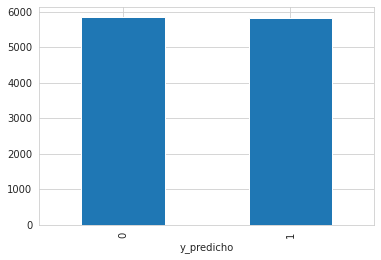

In [646]:
print("------------------Grafico Modelo----------------------")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
                       # variable numericas independiente vs target #
                       #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#                 

#--------------------#
# GRAFICO DE BARRAS  # importancia del group by
#--------------------#

data_final.groupby("y_predicho")["balance_income"].mean().plot.bar()
            #var.Cualitativa #var.Cuantitativa

#--------#
# filtro :
#--------#

#tabla
data_final.groupby("y_predicho")["balance_income"].mean()

###### total income log

------------------Grafico Data Real----------------------


Loan_Status
0    8.639197
1    8.608570
Name: total_income_log, dtype: float64

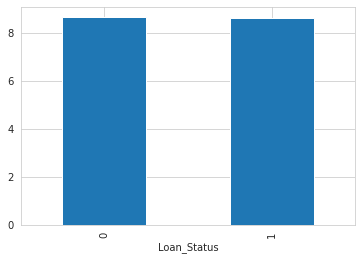

In [647]:
print("------------------Grafico Data Real----------------------")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
                       # variable numericas independiente vs target #
                       #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#                 

#--------------------#
# GRAFICO DE BARRAS  # importancia del group by
#--------------------#

data_final.groupby("Loan_Status")["total_income_log"].mean().plot.bar()
            #var.Cualitativa #var.Cuantitativa

#--------#
# filtro :
#--------#

#tabla
data_final.groupby("Loan_Status")["total_income_log"].mean()

------------------Grafico Modelo----------------------


y_predicho
0    8.628388
1    8.615180
Name: total_income_log, dtype: float64

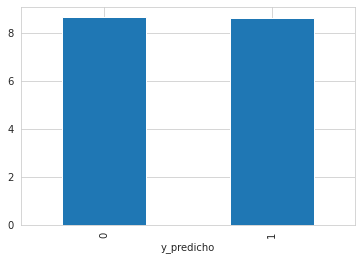

In [648]:
print("------------------Grafico Modelo----------------------")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
                       # variable numericas independiente vs target #
                       #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#                 

#--------------------#
# GRAFICO DE BARRAS  # importancia del group by
#--------------------#

data_final.groupby("y_predicho")["total_income_log"].mean().plot.bar()
            #var.Cualitativa #var.Cuantitativa

#--------#
# filtro :
#--------#

#tabla
data_final.groupby("y_predicho")["total_income_log"].mean()

###### ApplicantIncome

------------------Grafico Data Real----------------------


Loan_Status
0    4929.884615
1    4708.939850
Name: ApplicantIncome, dtype: float64

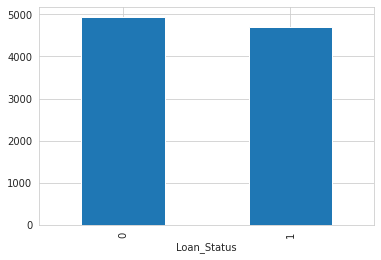

In [652]:
print("------------------Grafico Data Real----------------------")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
                       # variable numericas independiente vs target #
                       #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#                 

#--------------------#
# GRAFICO DE BARRAS  # importancia del group by
#--------------------#

data_final.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()
            #var.Cualitativa #var.Cuantitativa

#--------#
# filtro :
#--------#

#tabla
data_final.groupby("Loan_Status")["ApplicantIncome"].mean()

------------------Grafico Modelo----------------------


y_predicho
0    5119.928571
1    4708.821656
Name: ApplicantIncome, dtype: float64

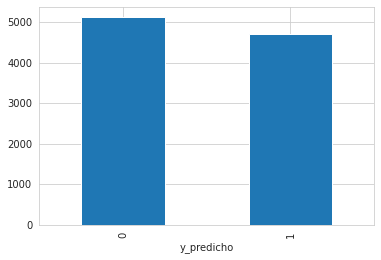

In [653]:
print("------------------Grafico Modelo----------------------")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
                       # variable numericas independiente vs target #
                       #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#                 

#--------------------#
# GRAFICO DE BARRAS  # importancia del group by
#--------------------#

data_final.groupby("y_predicho")["ApplicantIncome"].mean().plot.bar()
            #var.Cualitativa #var.Cuantitativa

#--------#
# filtro :
#--------#

#tabla
data_final.groupby("y_predicho")["ApplicantIncome"].mean()

###### LoanAmount

------------------Grafico Data Real----------------------


Loan_Status
0    147.019231
1    143.849624
Name: LoanAmount, dtype: float64

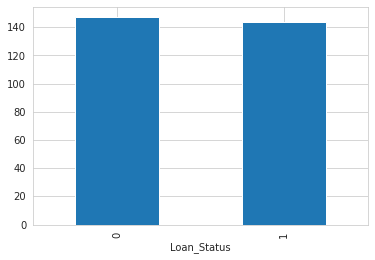

In [654]:
print("------------------Grafico Data Real----------------------")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
                       # variable numericas independiente vs target #
                       #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#                 

#--------------------#
# GRAFICO DE BARRAS  # importancia del group by
#--------------------#

data_final.groupby("Loan_Status")["LoanAmount"].mean().plot.bar()
            #var.Cualitativa #var.Cuantitativa

#--------#
# filtro :
#--------#

#tabla
data_final.groupby("Loan_Status")["LoanAmount"].mean()

------------------Grafico Modelo----------------------


y_predicho
0    132.250000
1    146.968153
Name: LoanAmount, dtype: float64

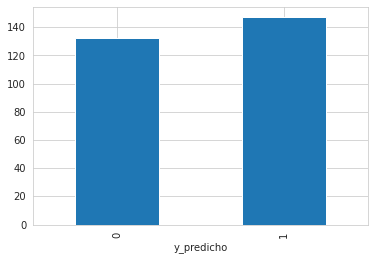

In [655]:
print("------------------Grafico Modelo----------------------")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
                       # variable numericas independiente vs target #
                       #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#                 

#--------------------#
# GRAFICO DE BARRAS  # importancia del group by
#--------------------#

data_final.groupby("y_predicho")["LoanAmount"].mean().plot.bar()
            #var.Cualitativa #var.Cuantitativa

#--------#
# filtro :
#--------#

#tabla
data_final.groupby("y_predicho")["LoanAmount"].mean()

###### emi

------------------Grafico Data Real----------------------


Loan_Status
0    0.485245
1    0.524464
Name: emi, dtype: float64

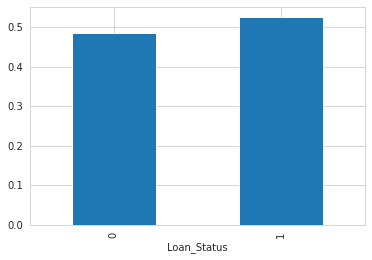

In [656]:
print("------------------Grafico Data Real----------------------")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
                       # variable numericas independiente vs target #
                       #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#                 

#--------------------#
# GRAFICO DE BARRAS  # importancia del group by
#--------------------#

data_final.groupby("Loan_Status")["emi"].mean().plot.bar()
            #var.Cualitativa #var.Cuantitativa

#--------#
# filtro :
#--------#

#tabla
data_final.groupby("Loan_Status")["emi"].mean()

------------------Grafico Modelo----------------------


y_predicho
0    0.418517
1    0.530370
Name: emi, dtype: float64

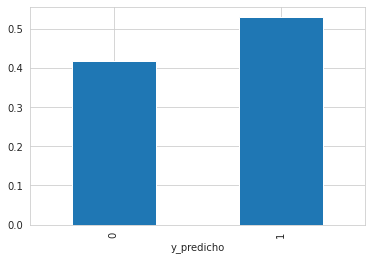

In [657]:
print("------------------Grafico Modelo----------------------")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
                       # variable numericas independiente vs target #
                       #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#                 

#--------------------#
# GRAFICO DE BARRAS  # importancia del group by
#--------------------#

data_final.groupby("y_predicho")["emi"].mean().plot.bar()
            #var.Cualitativa #var.Cuantitativa

#--------#
# filtro :
#--------#

#tabla
data_final.groupby("y_predicho")["emi"].mean()

###### CoapplicantIncome

------------------Grafico Data Real----------------------


Loan_Status
0    1828.961538
1    1449.196391
Name: CoapplicantIncome, dtype: float64

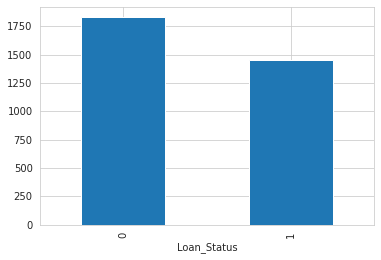

In [658]:
print("------------------Grafico Data Real----------------------")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
                       # variable numericas independiente vs target #
                       #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#                 

#--------------------#
# GRAFICO DE BARRAS  # importancia del group by
#--------------------#

data_final.groupby("Loan_Status")["CoapplicantIncome"].mean().plot.bar()
            #var.Cualitativa #var.Cuantitativa

#--------#
# filtro :
#--------#

#tabla
data_final.groupby("Loan_Status")["CoapplicantIncome"].mean()

------------------Grafico Modelo----------------------


y_predicho
0    1132.571429
1    1631.446624
Name: CoapplicantIncome, dtype: float64

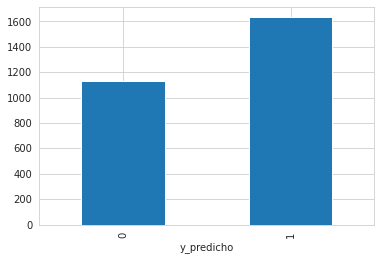

In [659]:
print("------------------Grafico Modelo----------------------")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
                       # variable numericas independiente vs target #
                       #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#                 

#--------------------#
# GRAFICO DE BARRAS  # importancia del group by
#--------------------#

data_final.groupby("y_predicho")["CoapplicantIncome"].mean().plot.bar()
            #var.Cualitativa #var.Cuantitativa

#--------#
# filtro :
#--------#

#tabla
data_final.groupby("y_predicho")["CoapplicantIncome"].mean()